# Set up paths

In [1]:
# Specify the lib path
lib_path<-paste(getwd(),'/hana_reanalysis_lib_r42',sep='')
print(lib_path)

# Set the path
.libPaths(lib_path)
.libPaths()

#Set the vis device
setHook(packageEvent("grDevices", "onLoad"),
function(...) grDevices::X11.options(type='cairo'))
options(device='x11')

[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"


[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"
[2] "/home/mdavenport/bin/R4.2.1/R-4.2.1/library"

# 3 - MEG associations

### Import

In [2]:
library(tidyverse)
library(WGCNA)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




### Read in data. Read in experimental design. 

In [3]:
net <-readRDS('2_wgcna_selected_purged_net_r42_broken_out.rds')
hana_design <- read.csv('hana_variables_by_sample.csv', header=TRUE, stringsAsFactors=FALSE)

#remove those samples I had to remove before
hana_design <- hana_design %>% filter(!sample_id %in% c("fv_ra_2", "mv_hvc_1"))

head(hana_design)
head(net$MEs)

,sample_id,animal,sex,dose,pallia,region,song_capable,node,song_system
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,fe_hvc_1,a,f,e,nido,hvc,y,dn,y
2,fe_hvc_2,b,f,e,nido,hvc,y,dn,y
3,fe_hvc_3,c,f,e,nido,hvc,y,dn,y
4,fe_pln_1,a,f,e,nido,pln,n,dn,n
5,fe_pln_2,b,f,e,nido,pln,n,dn,n
6,fe_pln_3,c,f,e,nido,pln,n,dn,n


,ME2,ME8,ME4,ME11,ME1,ME14,ME5,ME12,ME6,ME9,ME3,ME10,ME0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fe_an_1,0.13228979,-0.027382991,-0.037637380,-0.015783669,-0.05466811,0.223235091,-0.10033038,-0.04839298,0.01062152,-0.034954535,-0.06664011,0.001843282,-0.02570853
fe_an_2,0.15480032,-0.028171498,-0.002373231,0.256800784,-0.08578654,-0.038752513,-0.10197053,-0.04006914,-0.01404994,-0.022238371,-0.07795007,-0.069416205,-0.09752989
fe_an_3,0.11725144,0.005571085,-0.034747519,-0.023217746,-0.02021596,-0.020950488,-0.09059430,-0.01980841,0.04255413,-0.179675809,-0.03790480,0.007928457,0.21809043
fe_ax_1,0.01566468,-0.040542373,-0.206990365,0.027966101,0.19810091,0.424405897,-0.08530025,-0.04868079,-0.04309892,0.162617704,-0.04841866,0.035474344,0.03418208
fe_ax_2,-0.04173157,-0.053452053,-0.013933284,0.397512233,0.15094658,0.015225273,-0.10250359,-0.03704185,-0.05772286,0.005850349,-0.04127927,0.040634150,-0.02643993
fe_ax_3,-0.06386408,-0.039814282,-0.087049311,0.006507481,0.22478553,0.008869193,-0.08940201,-0.02379018,-0.03756456,0.136546573,-0.03648259,0.044146673,0.29073372


### Join and make it long form

In [4]:
net$MEs$ME0 <- NULL
net$MEs$sample_id <- rownames(net$MEs)
me_tbl   <- left_join(net$MEs, hana_design, by='sample_id') %>% 
    pivot_longer(cols=-one_of(colnames(hana_design)),
                 names_to='me',values_to="me_expression")
head(me_tbl) 
unique(me_tbl$me)

sample_id,animal,sex,dose,pallia,region,song_capable,node,song_system,me,me_expression
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
fe_an_1,a,f,e,nido,an,n,an,n,ME2,0.13228979
fe_an_1,a,f,e,nido,an,n,an,n,ME8,-0.02738299
fe_an_1,a,f,e,nido,an,n,an,n,ME4,-0.03763738
fe_an_1,a,f,e,nido,an,n,an,n,ME11,-0.01578367
fe_an_1,a,f,e,nido,an,n,an,n,ME1,-0.05466811
fe_an_1,a,f,e,nido,an,n,an,n,ME14,0.22323509


[1] "ME2"  "ME8"  "ME4"  "ME11" "ME1"  "ME14" "ME5"  "ME12" "ME6"  "ME9" 
[11] "ME3"  "ME10"

### Make the binary variables numeric binaries and convert the ME identifiers to letters

In [5]:
me_tbl <- me_tbl %>%
    mutate(is_song_cap = as.numeric(song_capable =='y')) %>%
    mutate(is_song_sys = as.numeric(song_system =='y')) %>%
    mutate(is_e2 = as.numeric(dose =='e')) %>%
    mutate(is_female = as.numeric(sex == 'f')) %>%
    mutate(me = recode_factor(me,
                                    'ME1'='A',
                                    'ME2'='B',
                                    'ME3'='C',
                                    'ME4'='D',
                                    'ME5'='E',
                                    'ME6'='F',

                                    'ME8'='G',
                                    'ME9'='H',
                                    'ME10'='I',
                                    'ME11'='J',
                                    'ME12'='K',

                                    'ME14'='L'
                             ))

head(me_tbl)

sample_id,animal,sex,dose,pallia,region,song_capable,node,song_system,me,me_expression,is_song_cap,is_song_sys,is_e2,is_female
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fe_an_1,a,f,e,nido,an,n,an,n,B,0.13228979,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,G,-0.02738299,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,D,-0.03763738,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,J,-0.01578367,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,A,-0.05466811,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,L,0.22323509,0,0,1,1


### Lets make all the subsets I think I might need

In [6]:
#Prep a list of data subsets
tbls<-list()

tbls$all <- me_tbl
tbls$all_song_veh <- me_tbl %>% filter(is_e2==0) %>% filter(is_song_sys==1)
tbls$all_surr_veh <- me_tbl %>% filter(is_e2==0) %>% filter(is_song_sys==0)
tbls$m_tbl <- me_tbl %>% filter(is_female==0)
tbls$f_tbl <- me_tbl %>% filter(is_female==1)
tbls$f_noE_tbl <- me_tbl %>% filter(is_female==1) %>% filter(is_e2==0)
tbls$f_E_tbl <- me_tbl %>% filter(is_female==1) %>% filter(is_e2==1)
tbls$f_song_tbl <- me_tbl %>% filter(is_female==1) %>% filter(is_song_sys==1)
tbls$f_surround <- me_tbl %>% filter(is_female==1) %>% filter(is_song_sys==0)
tbls$m_veh_song <- me_tbl %>% filter(is_female==0) %>% filter(is_song_sys==1)
tbls$m_veh_surr <- me_tbl %>% filter(is_female==0) %>% filter(is_song_sys==0)
tbls$m_E_tbl <- me_tbl %>% filter(is_female==0) %>% filter(is_e2==1)
tbls$m_noE_tbl <- me_tbl %>% filter(is_female==0) %>% filter(is_e2==0)

### Big thing to iterate over

In [7]:
#Prep a df node x me combos
crs_lst <-list()
crs_lst$nodes <- unique(me_tbl$node) 
crs_lst$mes <- unique(me_tbl$me) 
node_me_tbl <- cross_df(crs_lst) %>% t %>% as.data.frame
colnames(node_me_tbl) <- lapply(node_me_tbl,function(x){return(paste(x[1],x[2],sep='_'))})

#make a long form for later use
node_tbl_long <- node_me_tbl %>% t %>% as.data.frame
node_tbl_long$name <- rownames(node_tbl_long)

head(node_me_tbl)

,an_B,str_B,dn_B,la_B,an_G,str_G,dn_G,la_G,an_D,str_D,⋯,dn_H,la_H,an_C,str_C,dn_C,la_C,an_I,str_I,dn_I,la_I
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
nodes,an,str,dn,la,an,str,dn,la,an,str,⋯,dn,la,an,str,dn,la,an,str,dn,la
mes,B,B,B,B,G,G,G,G,D,D,⋯,H,H,C,C,C,C,I,I,I,I


### Iterate and calculate MEG - trait correlations

In [8]:
#Lets loop     
#first loop, data subset
res <- lapply(tbls,
             function(tbl){
                 #second loop, circuit node x ME combo
                 res <- lapply(node_me_tbl,
                               function(crs){
                                   
                                   #filter the table based on node x me
                                   tmp_tbl <- tbl %>% filter(node==crs[1],me==crs[2] %>% as.character)
                                   res<-list()
                                   res$song_cap_cor<- cor(tmp_tbl$me_expression, tmp_tbl$is_song_cap)
                                   res$song_sys_cor<- cor(tmp_tbl$me_expression, tmp_tbl$is_song_sys)
                                   res$sex_cor     <- cor(tmp_tbl$me_expression, tmp_tbl$is_female)
                                   res$e2_cor      <- cor(tmp_tbl$me_expression, tmp_tbl$is_e2)
                                   
                                   res$n_samp<-dim(tmp_tbl)[1]
                                   
                                   return(res)
                               }) 
                 return(res)
             })

In [9]:
head(res$all$an_G)

-0.3616686
-0.668343
-0.1581751
0.3900329


## Time to wrangle
### I want each subset to become a long form tibble

In [10]:
res2<- lapply(res,
            function(tbl){
                tmp <- tbl %>% 
                    as_tibble %>% mutate(measure=c('cap_cor','sys_cor','sex_cor','e2_cor','n'))
                res<-list()
                res$n_samps <- tmp %>% 
                    filter(measure=='n') %>% mutate(measure=NULL) %>%
                    pivot_longer(everything(),values_to='n') %>% mutate(n=as.numeric(n))
                
                res$cap_cor <- tmp %>% 
                    filter(measure=='cap_cor') %>% mutate(measure=NULL) %>%
                    pivot_longer(everything(),values_to='cap_cor') %>% 
                    mutate(cap_cor=as.numeric(cap_cor))

                res$sys_cor <- tmp %>% 
                    filter(measure=='sys_cor') %>% mutate(measure=NULL) %>%
                    pivot_longer(everything(),values_to='sys_cor')%>% 
                    mutate(sys_cor=as.numeric(sys_cor))
                
                res$sex_cor <- tmp %>% 
                    filter(measure=='sex_cor') %>% mutate(measure=NULL) %>%
                    pivot_longer(everything(),values_to='sex_cor')%>% 
                    mutate(sex_cor=as.numeric(sex_cor))
            
                res$e2_cor <- tmp %>% 
                    filter(measure=='e2_cor') %>% mutate(measure=NULL) %>%
                    pivot_longer(everything(),values_to='e2_cor') %>% 
                    mutate(e2_cor=as.numeric(e2_cor))
                
                res<-reduce(res,left_join, by='name') %>% 
                        mutate(node=substr(name,1,nchar(name)-2)) %>%
                        mutate(me=substr(name,nchar(name),nchar(name))) %>%
                        mutate(name=NULL)
                return(res)

                
            })

head(res2$all)

n,cap_cor,sys_cor,sex_cor,e2_cor,node,me
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
24,-0.6802170,-0.9297422,-0.11004754,-0.14038916,an,B
24,-0.2576695,-0.1139089,0.32218068,-0.46016699,str,B
23,-0.5738345,-0.5858565,-0.07538074,0.15235199,dn,B
23,-0.2995238,-0.3144562,0.10715860,-0.06734488,la,B
24,-0.3616686,-0.6683430,-0.15817510,0.39003294,an,G
24,0.7864366,0.5619798,-0.31435357,0.32843267,str,G


## Lovely, now lets calculate pvals within each node for each variable

In [11]:
res3 <- lapply(res2,
              function(tbl){
                    holder <-lapply(unique(tbl$node),
                               function(nd){
                                tmp <- tbl %>% filter(node==nd) 
                                tmp$cap_p <- corPvalueStudent(tmp$cap_cor, n=tmp$n[1])
                                tmp$sys_p <- corPvalueStudent(tmp$sys_cor, n=tmp$n[1])
                                tmp$sex_p <- corPvalueStudent(tmp$sex_cor, n=tmp$n[1])
                                tmp$e2_p <- corPvalueStudent(tmp$e2_cor, n=tmp$n[1])
                                
                                return(tmp)
                                       })
                  
                    res<-accumulate(holder, union)[[4]]
                  
                    return(res)
                            })

res4<- res3 %>% lapply(mutate,is_cap=(cap_p<=0.05)) %>% lapply(mutate,is_sys=(sys_p<=0.05)) %>%
                lapply(mutate,is_sex=(sex_p<=0.05)) %>% lapply(mutate,is_e2=(e2_p<=0.05))
head(res4$all)


n,cap_cor,sys_cor,sex_cor,e2_cor,node,me,cap_p,sys_p,sex_p,e2_p,is_cap,is_sys,is_sex,is_e2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
24,-0.68021702,-0.92974217,-0.1100475,-0.1403892,an,B,0.0002549773,5.114106e-11,0.60872119,0.51291799,TRUE,TRUE,FALSE,FALSE
24,-0.36166865,-0.66834301,-0.1581751,0.3900329,an,G,0.0824644121,3.575069e-04,0.46039522,0.05954247,FALSE,TRUE,FALSE,FALSE
24,-0.13166460,-0.14175369,-0.1072825,0.2483342,an,D,0.5396992616,5.087885e-01,0.61780619,0.24196866,FALSE,FALSE,FALSE,FALSE
24,0.11024950,0.02724158,0.3194104,0.3656498,an,J,0.6080597720,8.994512e-01,0.12815273,0.07889827,FALSE,FALSE,FALSE,FALSE
24,-0.07867826,-0.08999651,0.3592174,0.2373821,an,A,0.7147873899,6.757972e-01,0.08471973,0.26403403,FALSE,FALSE,FALSE,FALSE
24,0.19266124,0.10708317,0.3156551,0.4839820,an,L,0.3670840003,6.184634e-01,0.13295345,0.01655893,FALSE,FALSE,FALSE,TRUE


## Now lets geta separate table for each comparison

In [12]:
res_tbls <- list()
res_tbls$cap <- res4 %>% lapply(select,c('n','cap_cor','cap_p','is_cap','me','node'))
res_tbls$sys <- res4 %>% lapply(select,c('n','sys_cor','sys_p','is_sys','me','node'))
res_tbls$sex <- res4 %>% lapply(select,c('n','sex_cor','sex_p','is_sex','me','node'))
res_tbls$e2  <- res4 %>% lapply(select,c('n','e2_cor','e2_p','is_e2','me','node'))

names(res_tbls)
names(res_tbls$cap)
head(res_tbls$cap$all)

[1] "cap" "sys" "sex" "e2"

[1] "all"          "all_song_veh" "all_surr_veh" "m_tbl"        "f_tbl"       
 [6] "f_noE_tbl"    "f_E_tbl"      "f_song_tbl"   "f_surround"   "m_veh_song"  
[11] "m_veh_surr"   "m_E_tbl"      "m_noE_tbl"

n,cap_cor,cap_p,is_cap,me,node
<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
24,-0.68021702,0.0002549773,TRUE,B,an
24,-0.36166865,0.0824644121,FALSE,G,an
24,-0.13166460,0.5396992616,FALSE,D,an
24,0.11024950,0.6080597720,FALSE,J,an
24,-0.07867826,0.7147873899,FALSE,A,an
24,0.19266124,0.3670840003,FALSE,L,an


In [13]:
#read in and scrub the names`
res_tbls2 <- lapply(res_tbls, function(lst){
                    tbls <- lapply(lst,function(tbl){
                           names(tbl) <- c('n','cors','p','is_sig','me','node')
                           return(tbl)
                       })
                    return(tbls)
                   })
head(res_tbls2$cap$all)

n,cors,p,is_sig,me,node
<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
24,-0.68021702,0.0002549773,TRUE,B,an
24,-0.36166865,0.0824644121,FALSE,G,an
24,-0.13166460,0.5396992616,FALSE,D,an
24,0.11024950,0.6080597720,FALSE,J,an
24,-0.07867826,0.7147873899,FALSE,A,an
24,0.19266124,0.3670840003,FALSE,L,an


In [14]:
library(ggpubr)

In [15]:
head(res_tbls2)

n,cors,p,is_sig,me,node
<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
24,-0.68021702,2.549773e-04,TRUE,B,an
24,-0.36166865,8.246441e-02,FALSE,G,an
24,-0.13166460,5.396993e-01,FALSE,D,an
24,0.11024950,6.080598e-01,FALSE,J,an
24,-0.07867826,7.147874e-01,FALSE,A,an
24,0.19266124,3.670840e-01,FALSE,L,an
24,0.24510296,2.483491e-01,FALSE,E,an
24,-0.07222798,7.373291e-01,FALSE,K,an
24,0.78852235,4.719492e-06,TRUE,F,an


In [16]:
tmp <- res_tbls2$cap$f_tbl%>%filter(node=='dn')
tmp$q <- tmp$p %>% p.adjust(method='fdr')
tmp %>% filter(q<0.1)

n,cors,p,is_sig,me,node,q
<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<dbl>
12,0.7315594,0.006849133,TRUE,G,dn,0.08218959


In [17]:
#now to make plots
#function to grab the legend
g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)} 
                      
nms <- names(res_tbls2)
names(nms) <- nms
plt_lst <- lapply(nms,
                  function(nm){

                      plts <- map(res_tbls2[[nm]],
                                    function(tbl){
                                        tbl <- tbl %>% mutate(me=factor(as.factor(me), 
                                                                       rev(c('A','B','C','D','E',
                                                                             'F','G', 'H', 'I', 'J', 'K', 'L'))))
                                        plt<- tbl %>% ggplot(aes(x=node,
                                                                 y=me,
                                                                 fill=node)) +
                                            geom_point(aes(size=cors^2,
                                                           alpha=-log10(p)),
                                                       pch=21) +
                                            geom_point(aes(size=cors^2,
                                                           color=is_sig, 
                                                           fill=NULL),
                                                       pch=21, stroke=3) +
                                            scale_alpha(trans='exp')+
                                            scale_fill_brewer(type='qual', palette='Dark2') +
                                            scale_size(name='r^2 ',range = c(1, 12)) + 
                                            scale_color_manual(name='p <= 0.05',values=c("grey","black")) +
                                            scale_x_discrete(labels = c("AN", "DN", "LA", "STR"))+
                                            theme_grey(base_size=25) +
                                            ylab('') + xlab('') + 
                                            guides(fill=FALSE, alpha=FALSE)+
                                            theme(legend.position="right",
                                                  legend.box = "vertical")
                                        return(plt)
                                    })
                      
                      lgnd <- g_legend(plts$all)
                      plts <- lapply(plts,function(plt){return(plt + theme(legend.position='none'))})
                      
                      plts$lgnd <- lgnd
                      #plts$dendro <- dendro
                      return(plts)
})

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = F

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


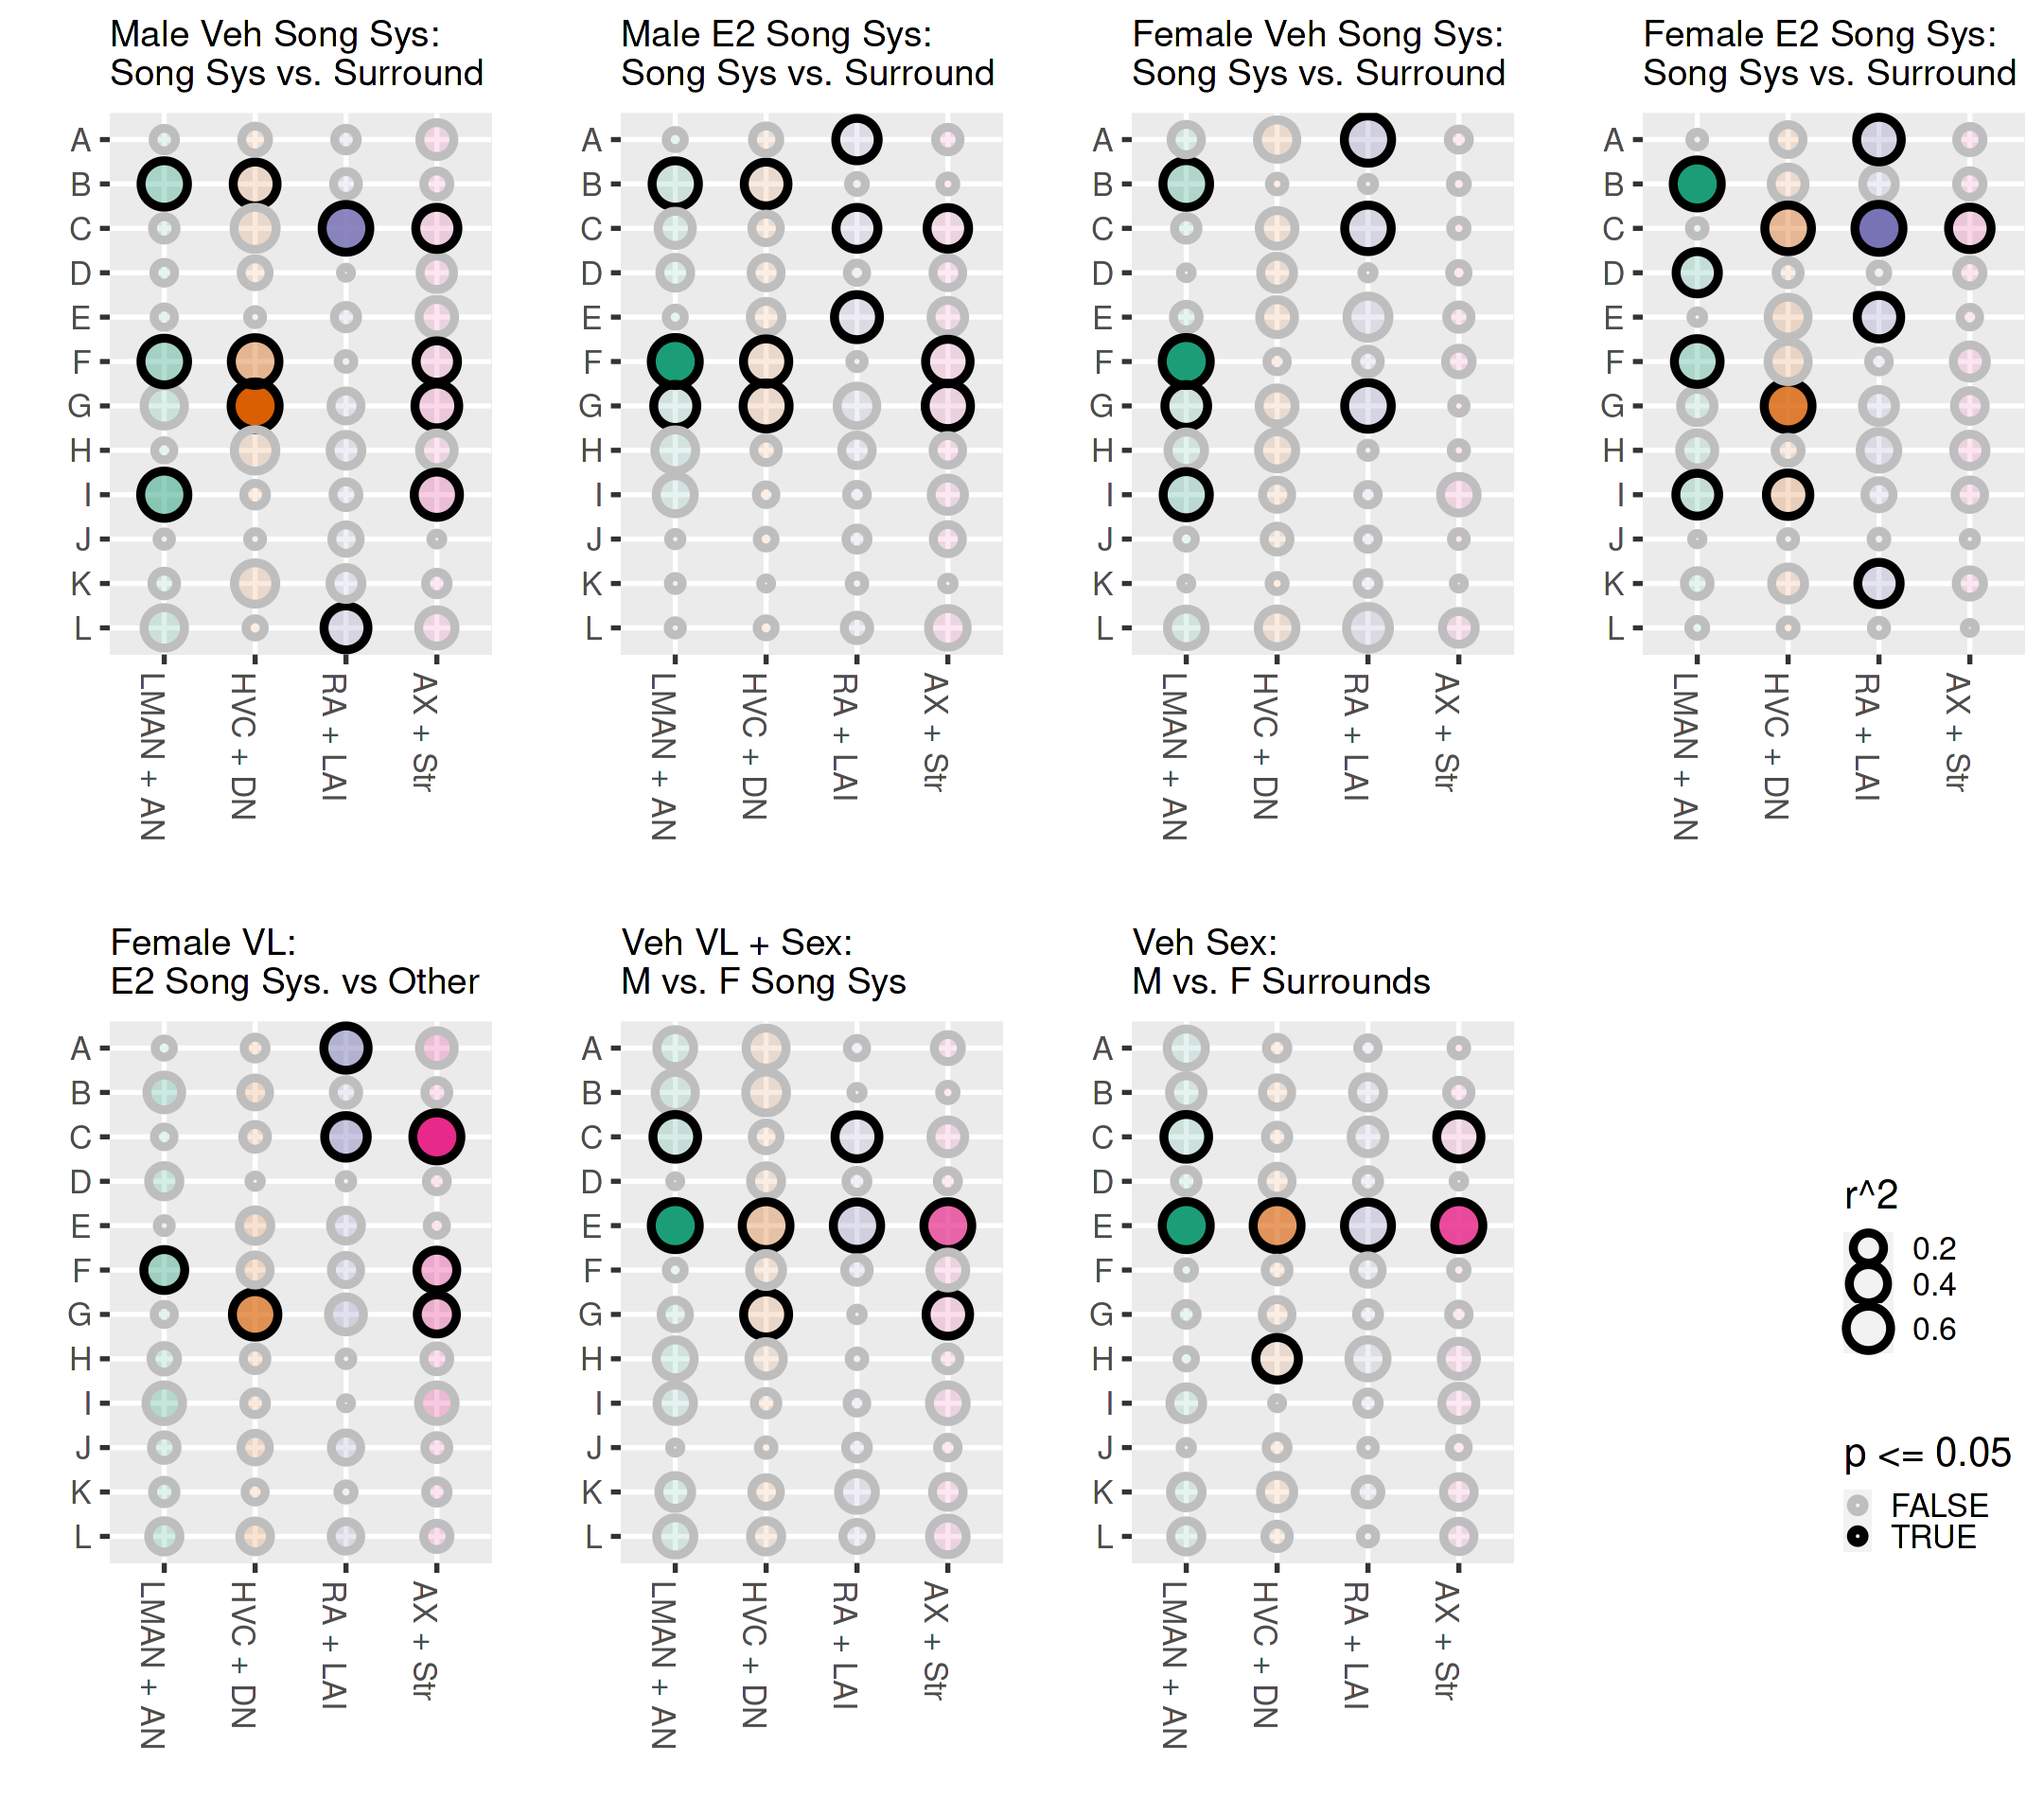

In [18]:
options(repr.plot.width=15, repr.plot.height=8)


a<-plt_lst$sys$m_noE_tbl +ggtitle('Male Veh Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str')) + 
theme(axis.text.x=element_text(angle = 270, hjust = 0),plot.title =element_text(size=23) )


b<-plt_lst$sys$m_E_tbl +ggtitle('Male E2 Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )

c<-plt_lst$sys$f_noE_tbl +ggtitle('Female Veh Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str')) + 
theme(axis.text.x=element_text(angle = 270, hjust = 0),plot.title =element_text(size=23) )


d<-plt_lst$sys$f_E_tbl +ggtitle('Female E2 Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )

e<-plt_lst$cap$f_tbl +ggtitle('Female VL: \nE2 Song Sys. vs Other') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str')) + 
theme(axis.text.x=element_text(angle = 270, hjust = 0),plot.title =element_text(size=23) )

f<-plt_lst$cap$all_song_veh +ggtitle('Veh VL + Sex:\nM vs. F Song Sys') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )

g<-plt_lst$sex$all_surr_veh +ggtitle('Veh Sex: \nM vs. F Surrounds') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )


options(repr.plot.width=18, repr.plot.height=16)
top<-ggarrange(a,b,c,d,nrow=1,widths=c(1,1,1,1))
bottom<- ggarrange(e,f,g,NULL,plt_lst$cap$lgnd,nrow=1,widths=c(1,1,1,.5,.5))

fig2_bubles<- ggarrange(top,bottom,nrow=2)
fig2_bubles

ggsave(file='svg_files/fig2_bubles.svg',plot = fig2_bubles,width = 18, height = 16)

In [19]:
res_tbls2$sex$all_surr_veh %>% filter(p <0.05)

n,cors,p,is_sig,me,node
<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
6,-0.9972747,1.113079e-05,TRUE,E,an
6,0.9081889,1.225695e-02,TRUE,C,an
6,-0.9965706,1.762057e-05,TRUE,E,str
6,0.8942554,1.618165e-02,TRUE,C,str
6,-0.9948487,3.973604e-05,TRUE,E,dn
6,0.8494029,3.231151e-02,TRUE,H,dn
6,-0.9703723,1.303697e-03,TRUE,E,la


## FDR corrected

In [20]:
res_tbls3 <- res_tbls2 %>% lapply(function(tbl){
    tbl %>% lapply(function(ttbl){
        nodes <- unique(ttbl$node)
        names(nodes) <- nodes
        nodes %>% lapply(function(nd){
            ttbl<-ttbl %>% filter(node==nd)
            ttbl$q <- p.adjust(ttbl$p,method='fdr')
            ttbl$is_sig2 <- ttbl$q <= 0.1
            return(ttbl)
        }) %>% purrr::reduce(rbind)
    }) 
}) 

In [21]:
#now to make plots
#function to grab the legend
g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)} 
                      
nms_2 <- names(res_tbls3)
names(nms_2) <- nms_2
plt_lst_2 <- lapply(nms_2,
                  function(nm){

                      plts <- map(res_tbls3[[nm]],
                                    function(tbl){
                                        tbl <- tbl %>% mutate(me=factor(as.factor(me), 
                                                                       rev(c('A','B','C','D','E',
                                                                             'F','G', 'H', 'I', 'J', 'K', 'L'))))
                                        plt<- tbl %>% ggplot(aes(x=node,
                                                                 y=me,
                                                                 fill=node)) +
                                            geom_point(aes(size=cors^2,
                                                           alpha=-log10(q)),
                                                       pch=21) +
                                            geom_point(aes(size=cors^2,
                                                           color=is_sig2, 
                                                           fill=NULL),
                                                       pch=21, stroke=3) +
                                            scale_alpha(trans='exp')+
                                            scale_fill_brewer(type='qual', palette='Dark2') +
                                            scale_size(name='r^2 ',range = c(1, 12)) + 
                                            scale_color_manual(name='q <= 0.10',values=c("grey","black")) +
                                            scale_x_discrete(labels = c("AN", "DN", "LA", "STR"))+
                                            theme_grey(base_size=25) +
                                            ylab('') + xlab('') + 
                                            guides(fill=FALSE, alpha=FALSE)+
                                            theme(legend.position="right",
                                                  legend.box = "vertical")
                                        return(plt)
                                    })
                      
                      lgnd <- g_legend(plts$all)
                      plts <- lapply(plts,function(plt){return(plt + theme(legend.position='none'))})
                      
                      plts$lgnd <- lgnd
                      #plts$dendro <- dendro
                      return(plts)
})

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = F

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


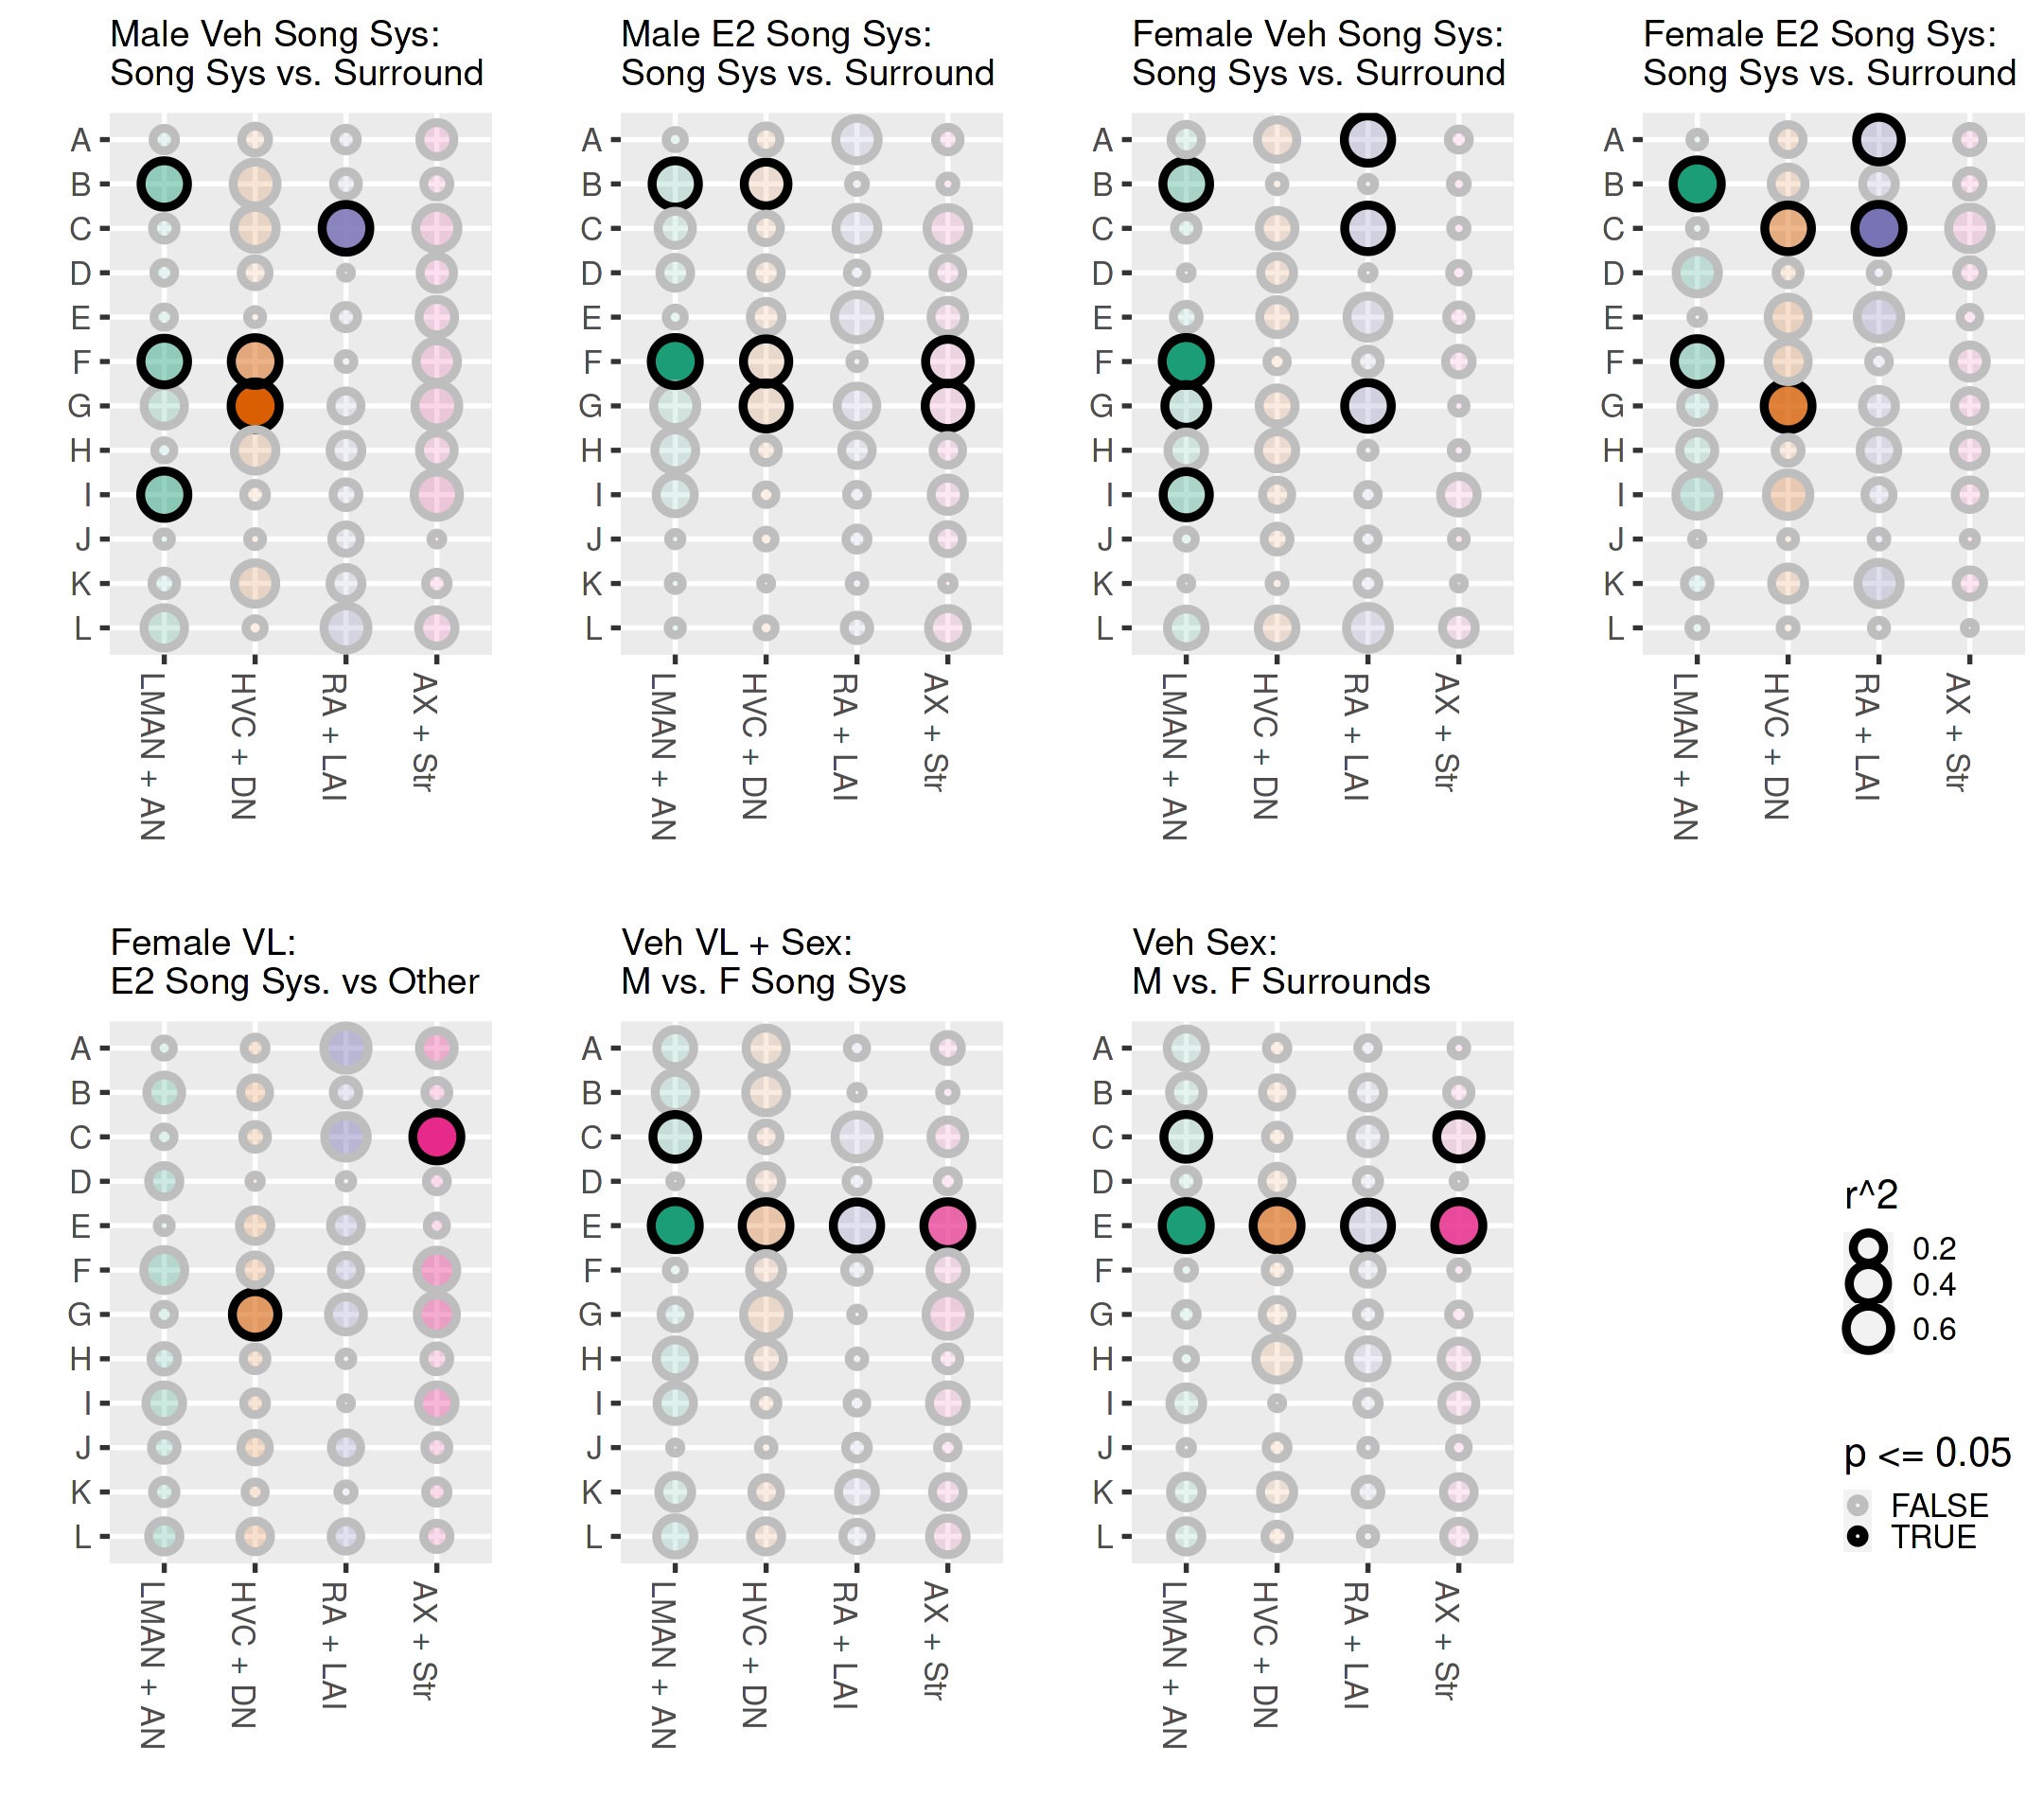

In [22]:
options(repr.plot.width=15, repr.plot.height=8)


a<-plt_lst_2$sys$m_noE_tbl +ggtitle('Male Veh Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str')) + 
theme(axis.text.x=element_text(angle = 270, hjust = 0),plot.title =element_text(size=23) )


b<-plt_lst_2$sys$m_E_tbl +ggtitle('Male E2 Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )

c<-plt_lst_2$sys$f_noE_tbl +ggtitle('Female Veh Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str')) + 
theme(axis.text.x=element_text(angle = 270, hjust = 0),plot.title =element_text(size=23) )


d<-plt_lst_2$sys$f_E_tbl +ggtitle('Female E2 Song Sys:\nSong Sys vs. Surround') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )

e<-plt_lst_2$cap$f_tbl +ggtitle('Female VL: \nE2 Song Sys. vs Other') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str')) + 
theme(axis.text.x=element_text(angle = 270, hjust = 0),plot.title =element_text(size=23) )

f<-plt_lst_2$cap$all_song_veh +ggtitle('Veh VL + Sex:\nM vs. F Song Sys') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )

g<-plt_lst_2$sex$all_surr_veh +ggtitle('Veh Sex: \nM vs. F Surrounds') + 
scale_x_discrete(labels=c('LMAN + AN','HVC + DN','RA + LAI','AX + Str'))+
theme(axis.text.x=element_text(angle = 270, hjust=0),plot.title =element_text(size=23) )


options(repr.plot.width=18, repr.plot.height=16)
top<-ggarrange(a,b,c,d,nrow=1,widths=c(1,1,1,1))
bottom<- ggarrange(e,f,g,NULL,plt_lst$cap$lgnd,nrow=1,widths=c(1,1,1,.5,.5))

fig2_bubles<- ggarrange(top,bottom,nrow=2)
fig2_bubles

ggsave(file='svg_files/fig2_bubles_fdr.svg',plot = fig2_bubles,width = 18, height = 16)

## Now I need heatmaps of MEG expressions and rasters relating samples in those heatmaps to variables

In [23]:
head(me_tbl)
unique(me_tbl$me)

sample_id,animal,sex,dose,pallia,region,song_capable,node,song_system,me,me_expression,is_song_cap,is_song_sys,is_e2,is_female
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fe_an_1,a,f,e,nido,an,n,an,n,B,0.13228979,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,G,-0.02738299,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,D,-0.03763738,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,J,-0.01578367,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,A,-0.05466811,0,0,1,1
fe_an_1,a,f,e,nido,an,n,an,n,L,0.22323509,0,0,1,1


[1] B G D J A L E K F H C I
Levels: A B C D E F G H I J K L

In [24]:
#Put the MEGs in order by size of M
me_tbl2 <- me_tbl %>% mutate(me_fct = factor(as.factor(me),
                                             c('A','B','C','D','E','F','G', 'H', 'I', 'J', 'K', 'L'))) %>% 
    mutate(me_int = substr(me,3,4) %>% strtoi )

In [25]:
#Create a list of tbls subsetted by node
node_me_tbls <- me_tbl2 %>% group_by(node) %>% group_split
names(node_me_tbls) <- node_me_tbls %>% lapply(function(tbl){return(tbl$node[1])})

In [26]:
#Create a list of list of sample names, arranged
node_me_tbls2 <- node_me_tbls %>% lapply(function(tbl){
    
    #arrange and get the order
    tbl <- tbl %>% arrange(desc(is_song_cap), desc(is_song_sys), desc(is_e2), desc(is_female), animal) 
    fct_order <- tbl$sample_id %>% unique
    
    return(tbl %>% 
               mutate(sample_id=factor(sample_id, fct_order)))
    
    
    })

In [27]:
#handle the node specific stuff for coloring.
#I need the vector of mod sizes 
'%!in%' <- function(x,y)!('%in%'(x,y))
mod_size_tbl <- table(net$colors) %>% as.data.frame %>% as_tibble %>% filter(Var1 %!in% c('0','7','13'))

mod_size_tbl <- mod_size_tbl %>%
    mutate(Var1 = factor(Var1,(unique(mod_size_tbl$Var1)))) %>%
    mutate(me = recode_factor(mod_size_tbl$Var1,
                                   '1'='A',
                                    '2'='B',
                                    '3'='C',
                                    '4'='D',
                                    '5'='E',
                                    '6'='F',

                                    '8'='G',
                                    '9'='H',
                                    '10'='I',
                                    '11'='J',
                                    '12'='K',

                                    '14'='L')) %>%
    mutate(me = factor(me,unique(me)))

head(mod_size_tbl)

Var1,Freq,me
<fct>,<int>,<fct>
1,4890,A
2,2496,B
3,1695,C
4,1390,D
5,904,E
6,691,F


### Yeah, I should've made a function for this, but I was having a bad day and couldn't be bothered so I copied and pasted

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



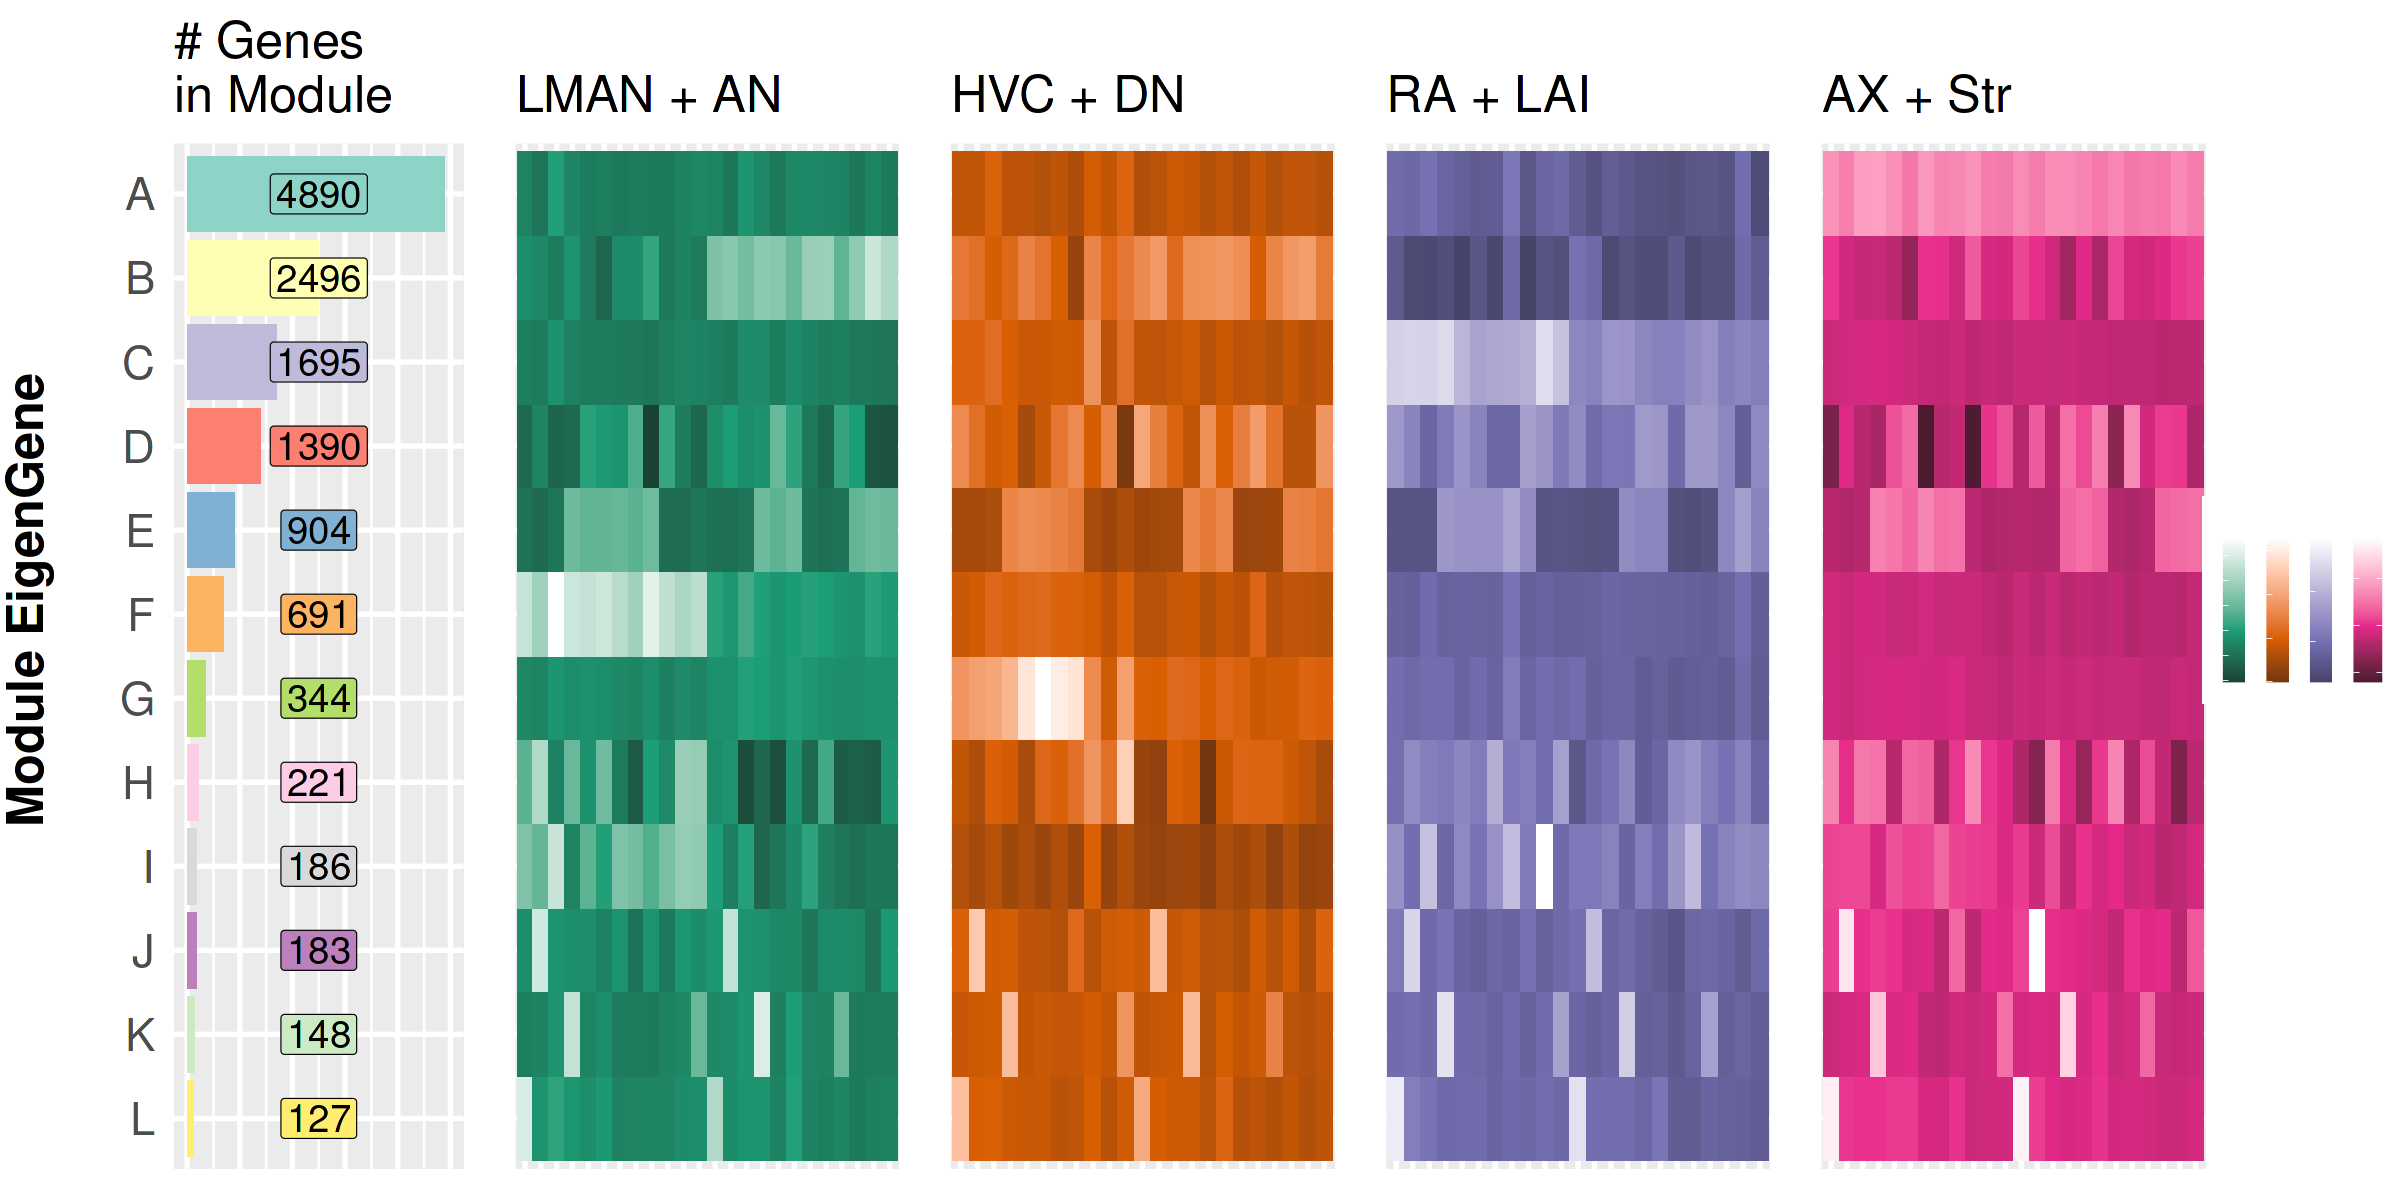

In [28]:
plts_lst <- list()


    
me_size <- list()
me_size$me_size <- mod_size_tbl %>% ggplot(aes(x=Freq, y=me))+
                    geom_bar(stat='identity',aes(fill=me))+
                    scale_fill_brewer(palette = 'Set3') +
                    scale_fill_manual(values = c('black')) +
                    geom_label(aes(x=2500,label=Freq,fill=me),size=8)+
                    scale_fill_brewer(palette = 'Set3') +
                    scale_y_discrete(limits = rev(levels(mod_size_tbl$me))) +
                    theme_grey(base_size=25) + 
                    ggtitle('# Genes\nin Module') +
                    scale_x_continuous(limits=c(0,5000)) +
                    ylab('') + xlab('') +
                    theme(axis.text.x=element_blank(),
                          axis.text.y=element_text(size=27),
                          axis.title.x=element_blank(),
                          axis.line=element_blank(),
                          axis.ticks=element_blank(),
                         legend.position='none')
 

plts_lst$an <- ggplot(node_me_tbls2$an, aes(y=me,x=sample_id, fill=me_expression)) + geom_tile() +
    scale_fill_gradient2(low = "black",
    mid = "#1b9e77",
    high = "white") + 
    theme_grey(base_size=25) +
    ggtitle('\nLMAN + AN') +
    scale_y_discrete(limits = rev(levels(node_me_tbls2$an$me))) +
    xlab('') + ylab('') + 
    theme(legend.text=element_blank(),
         legend.title=element_blank(),
         axis.title=element_blank(),
         axis.text = element_blank(),
         axis.ticks = element_blank())

plts_lst$dn <- ggplot(node_me_tbls2$dn, aes(y=me,x=sample_id, fill=me_expression)) + geom_tile() +
    scale_fill_gradient2(low = "black",
    mid = "#d95f02",
    high = "white") + 
    theme_grey(base_size=25) +
    scale_y_discrete(limits = rev(levels(node_me_tbls2$dn$me))) +
    ggtitle('\nHVC + DN') +
    xlab('') + ylab('') + 
    theme(legend.text=element_blank(),
         legend.title=element_blank(),
         axis.title=element_blank(),
         axis.text = element_blank(),
         axis.ticks = element_blank())

plts_lst$la <- ggplot(node_me_tbls2$la, aes(y=me,x=sample_id, fill=me_expression)) + geom_tile() +
    scale_fill_gradient2(low = "black",
    mid = "#7570b3",
    high = "white") +
    theme_grey(base_size=25) +
    scale_y_discrete(limits = rev(levels(node_me_tbls2$la$me))) +
    ggtitle('\nRA + LAI') +
    xlab('') + ylab('') + 
    theme(legend.text=element_blank(),
         legend.title=element_blank(),
         axis.title=element_blank(),
         axis.text = element_blank(),
         axis.ticks = element_blank())

plts_lst$str <- ggplot(node_me_tbls2$str, aes(y=me,x=sample_id, fill=me_expression)) +
    geom_tile() +
    scale_fill_gradient2(
        low = "black",
        mid = "#e7298a",
        high = "white") +
    theme_grey(base_size=25) +
    scale_y_discrete(limits = rev(levels(node_me_tbls2$str$me))) +
    ggtitle('\nAX + Str') +
    xlab('') + ylab('') + 
    theme(legend.text = element_blank(),
         legend.title=element_blank(),
         axis.title=element_blank(),
         axis.text = element_blank(),
         axis.ticks = element_blank())

#Get the legends
plts_lst_lgnds <- plts_lst %>% lapply(g_legend)

#Strip the legends 
plts_lst <- plts_lst %>% lapply(function(plt){return( plt+theme(legend.position='none'))}) 

options(repr.plot.width=20, repr.plot.height=10)

fig1_2_1 <- ggarrange(plotlist=c(me_size, plts_lst,plts_lst_lgnds),
                    widths=c(1,1,1,1,1,.1,.1,.1,.1), nrow=1) %>% 
                        annotate_figure(left = text_grob("Module EigenGene",rot = 90, 
                                        face = "bold", size = 30)
                        )

fig1_2_1

## Ok Now I need rasters. First I need to pivot each independ variable wide 
## So matirx with sample as col, var as row for each region.

In [29]:
var_tbls<-lapply(node_me_tbls2,
                 function(tbl){
                     var_lst<- lapply(c('is_song_cap', 'is_song_sys', 'is_female', 'is_e2'),
                            function(nm){
                                tbl2 <- tbl %>% select(one_of(c('sample_id',nm))) %>% 
                                            distinct %>% as.data.frame
                                rownames(tbl2) <- tbl2$sample_id
                                tbl2$sample_id <- NULL
                                tbl2 <- tbl2 %>% t %>% as_tibble %>% mutate(variable=nm)
                                
                                return(tbl2)
                            })
                     var_tbl <- bind_rows(var_lst) %>% pivot_longer(cols= -one_of('variable'),
                                                                    names_to='sample_id',
                                                                    values_to='is_true') %>%
                                                    mutate(sample_id = factor(as.factor(sample_id),
                                                                             levels(tbl$sample_id))) %>%
                                                    mutate(variable = factor(as.factor(variable),
                                                                            c('is_female',
                                                                             'is_e2',
                                                                             'is_song_sys',
                                                                             'is_song_cap')))

                     return(var_tbl)
                 })

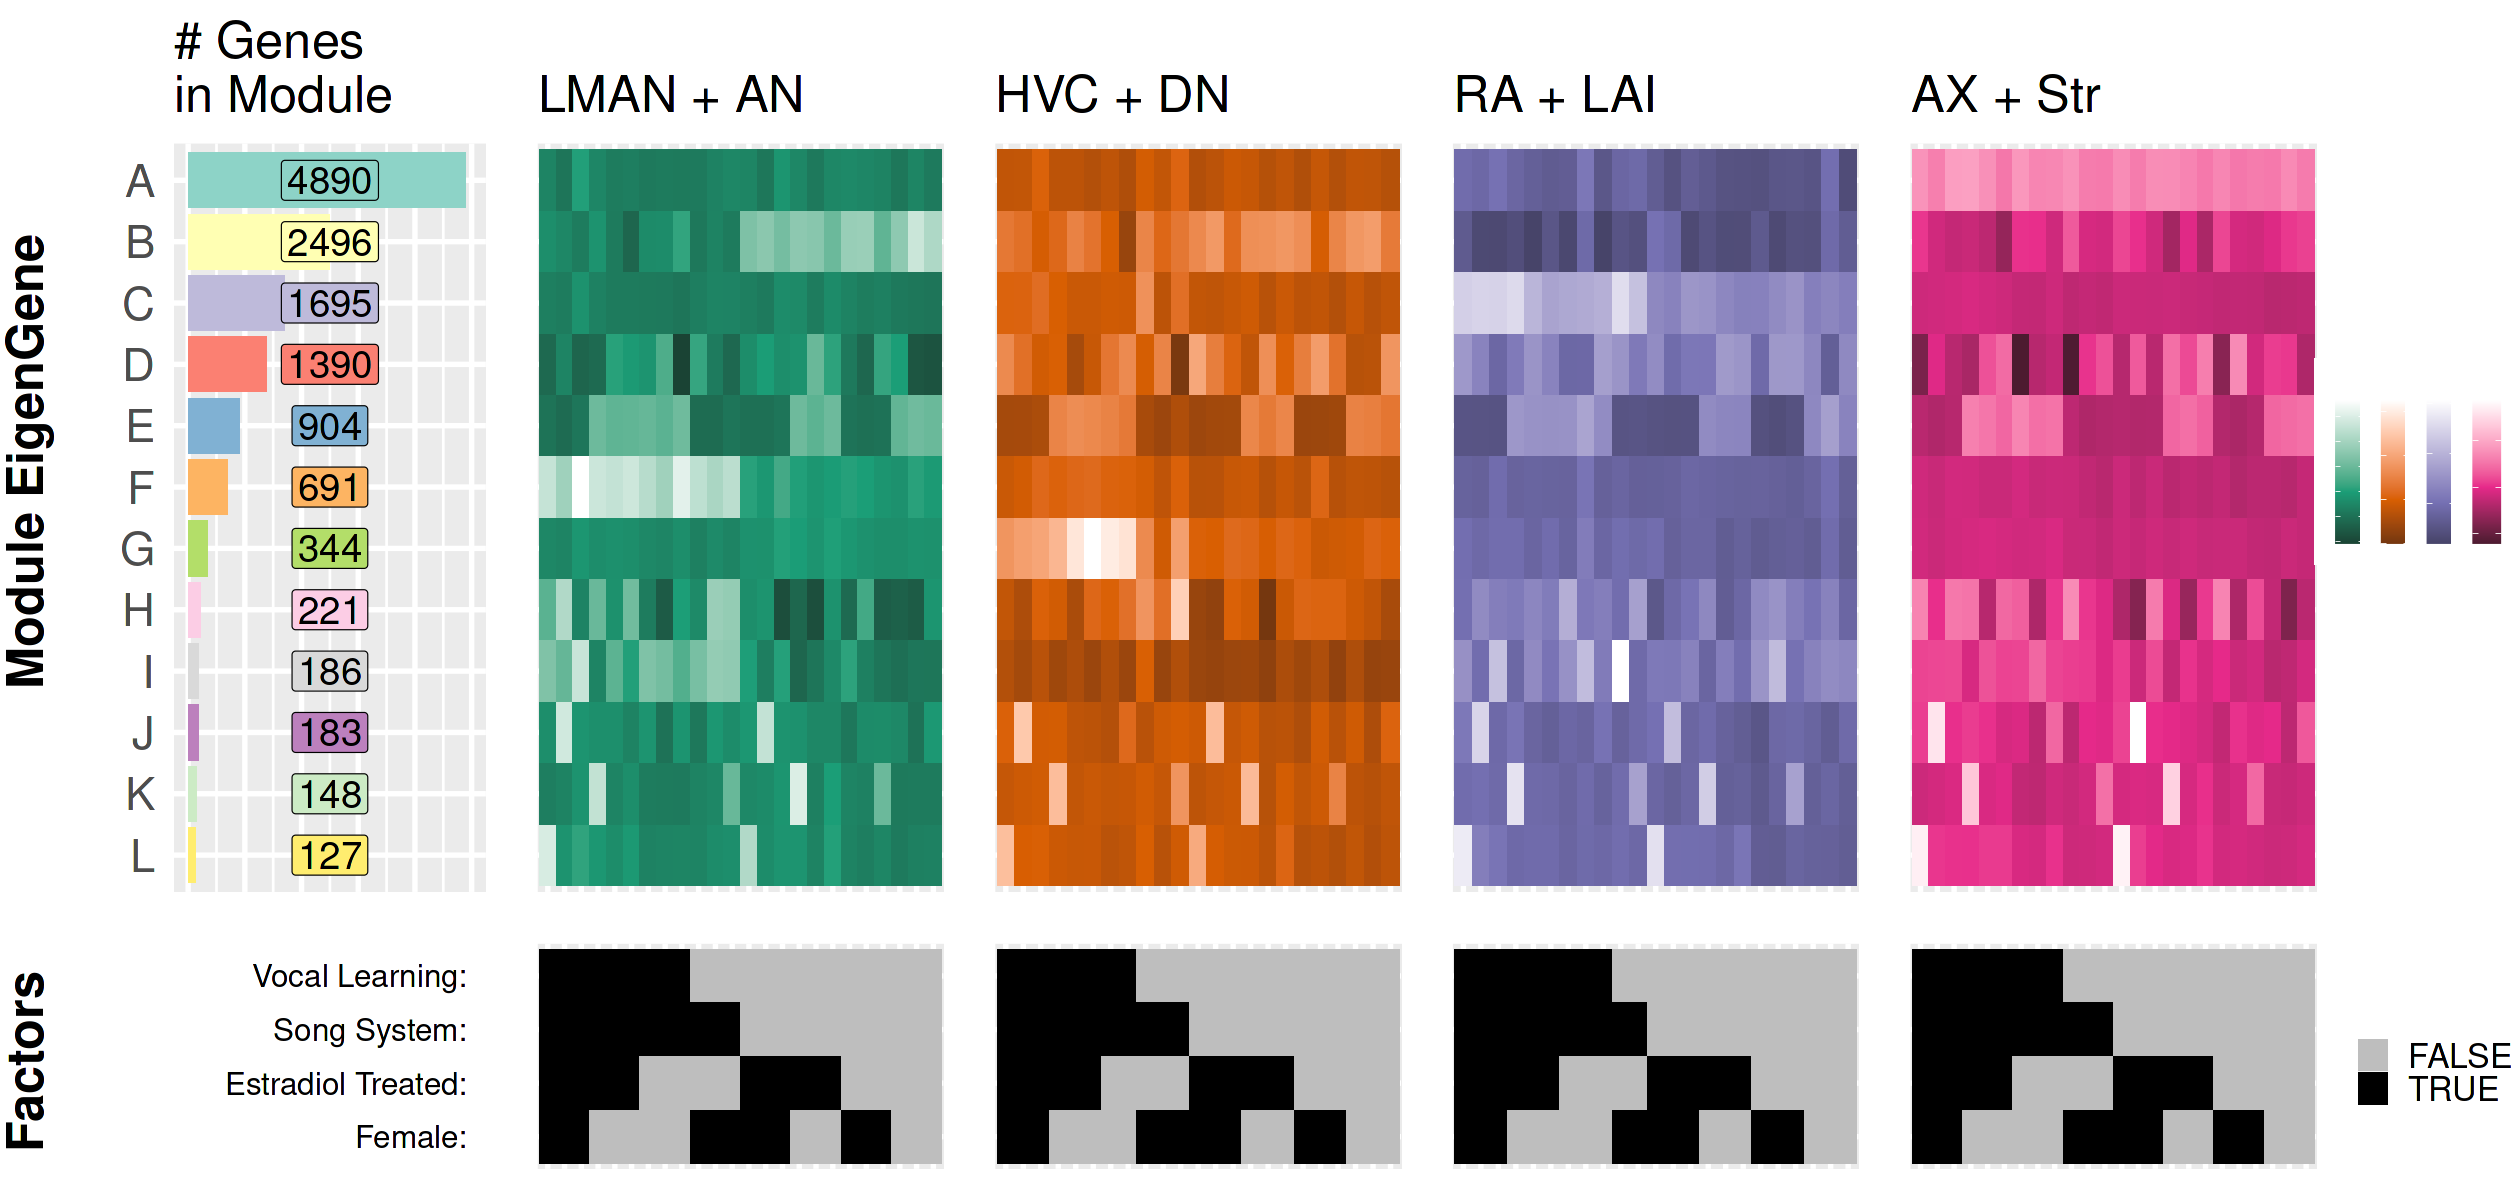

In [30]:
raster_lst <- lapply(var_tbls,
                    function(tbl){
                        plt<- tbl %>%
                            ggplot(aes(x=sample_id,y=variable,fill=as.logical(is_true))) +
                            geom_tile() +
                            theme_grey(base_size=25)+
                            scale_fill_manual(values = c("grey", "black")) +
                            theme(legend.title=element_blank(),
                              axis.title =element_blank(),
                              axis.text = element_blank(),
                              axis.ticks = element_blank())
                        return(plt)
                    })

raster_lst$lgnd <- g_legend(raster_lst$an)

var_lbl <- tibble(var=factor(as.factor(c('Vocal Learning:',
                'Song System:',
                'Estradiol Treated:',
                'Female:')), 
                c('Female:',
                'Estradiol Treated:',
                'Song System:',
                'Vocal Learning:')))

raster_lbl <- ggplot(var_lbl,aes(x=1,y=var)) +
        geom_text(aes(label=var), stat='identity',size=6.5,hjust=1) +
        theme_classic(base_size=25) +
         xlim(0, 1) +
        theme(legend.title=element_blank(),
            axis.title = element_blank(),
            axis.text = element_blank(),
            axis.ticks = element_blank(),
            axis.line = element_line(color='white'))


fig1_2_2 <- ggarrange(raster_lbl,
         raster_lst$an +theme(legend.position='none'),
         raster_lst$dn +theme(legend.position='none'),
         raster_lst$la +theme(legend.position='none'),
         raster_lst$str +theme(legend.position='none'),
         raster_lst$lgnd, 
         nrow=1, widths=c(1,1,1,1,1,.4)) %>% 
                        annotate_figure(left = text_grob("Factors",rot = 90, 
                                        face = "bold", size = 30))

options(repr.plot.width=21, repr.plot.height=10)
fig1_2 <- ggarrange(fig1_2_1,fig1_2_2,nrow=2,heights=c(1,.3))
fig1_2

In [31]:
ggsave(file="svg_files/fig1d.svg", plot=fig1_2,width=21, height=10)

### I'd like a nice dendrogram too

In [32]:
library(RColorBrewer)

In [33]:
unique(net$colors)
net$colors[which(net$colors>13)] <- net$colors[which(net$colors>13)] -1
net$colors[which(net$colors>7)] <- net$colors[which(net$colors>7)] -1
net$colors[which(net$colors==0)] <- 13

unique(net$colors)

[1]  0 11  4  1  3  2  6 10  5 14  8  9 12

[1] 13 10  4  1  3  2  6  9  5 12  7  8 11

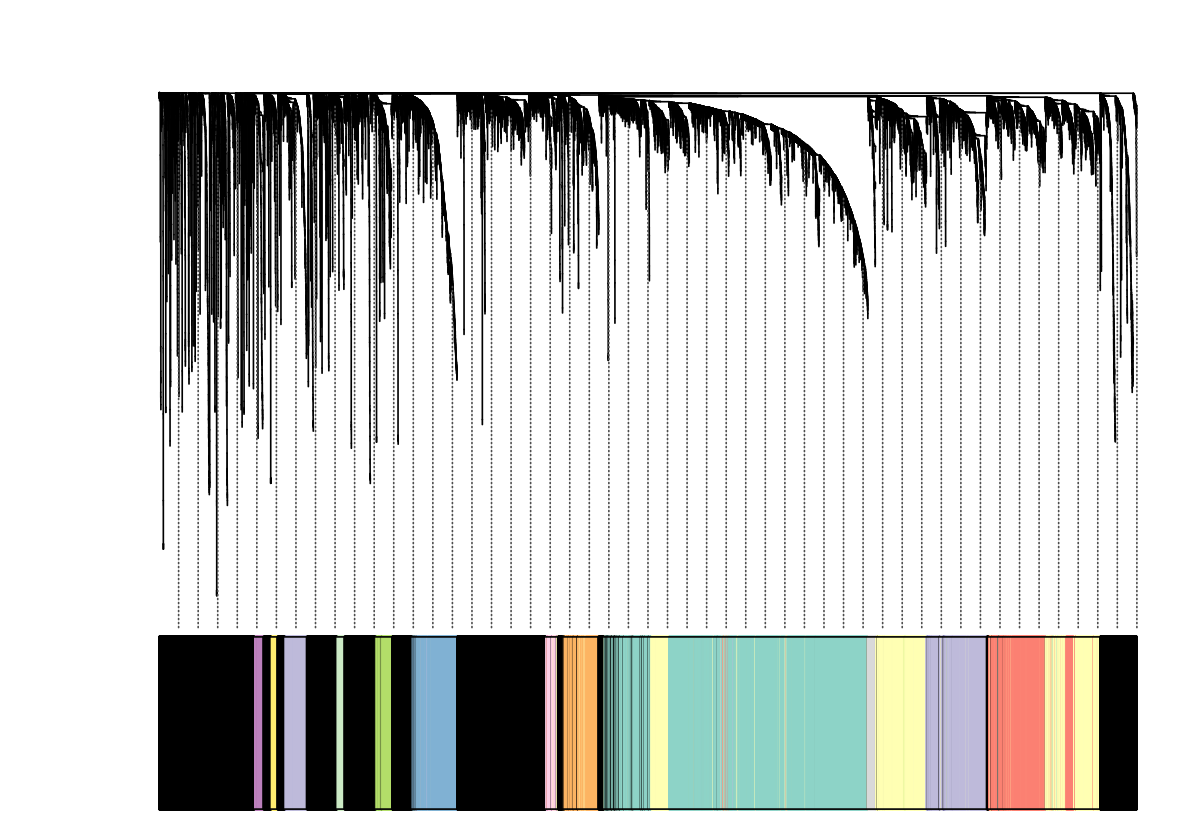

In [34]:
pal <- c(brewer.pal(12, 'Set3'),'#000000') 


mergedColors = labels2colors(net$colors, zeroIsGrey = TRUE,
                            colorSeq = pal)

options(repr.plot.width=10, repr.plot.height=7)

plotDendroAndColors(net$input_data$unrecut_net$dendrograms[[1]], 
    mergedColors[net$input_data$unrecut_net$blockGenes[[1]]],
    '', ylab='' , main='',
    axes=FALSE,
    dendroLabels = FALSE, hang = 0.01,
    addGuide = TRUE, guideHang = .01,
    setLayout = TRUE,
    autoColorHeight = FALSE, colorHeight=.25)


In [35]:
svg('svg_files/fig1c.svg',width = 10,height = 7)
plotDendroAndColors(net$input_data$unrecut_net$dendrograms[[1]], 
    mergedColors[net$input_data$unrecut_net$blockGenes[[1]]],
    '', ylab='' , main='',
    axes=FALSE,
    dendroLabels = FALSE, hang = 0.01,
    addGuide = TRUE, guideHang = .01,
    setLayout = TRUE,
    autoColorHeight = FALSE, colorHeight=.25)
dev.off()

ERROR: Error in svg("svg_files/fig1c.svg", width = 10, height = 7): svg: Cairo-based devices are not available for this platform


## Boom. I need to hack a legend for it, use the size plot

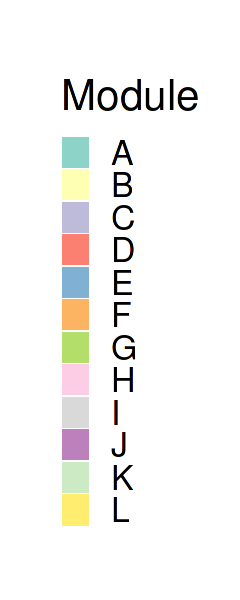

In [36]:
options(repr.plot.width=2, repr.plot.height=5)

gene_tree_lgnd <- mod_size_tbl %>% ggplot(aes(x=Freq, y=me))+
                    geom_bar(stat='identity',aes(fill=me))+
                    scale_fill_brewer(name='Module',palette = 'Set3') +
                    theme_classic(base_size=25) + 
                    theme(legend.position='right') 

gene_tree_lgnd <- gene_tree_lgnd %>% g_legend %>% ggarrange
gene_tree_lgnd

ggsave(file="svg_files/fig1_legend.svg", plot=gene_tree_lgnd,width=2, height=5)

### WOOO!!! I think that's a great place to wrap that up for now. Might come back and make some more heatmaps at some point, but boom. I think that all looks awesome. Lets add res to net (which has been slightly modified) and save the thing out.

In [37]:
net$node_me_tbls2 <- NULL
net$MEG_res_tbls <- res_tbls2
net$node_me_tbls <- node_me_tbls2
names(net)

[1] "colors"         "unmergedColors" "cutreeLabels"   "MEs"           
[5] "MEsOK"          "input_data"     "MEG_res_tbls"   "node_me_tbls"

In [38]:
saveRDS(net, '3_wgcna_net_associatedToTraits_broken_out.rds')

## MEG a specialization to RA would probably com out if I paired the data or otherwise accounted for that outlier animal. Lets do a quick and dirty non-parametric test

In [39]:
x <- net$node_me_tbls$la %>% filter(me=='A') %>% filter(is_female == 0) %>% filter(is_song_cap==1) %>% select(me_expression) 
y <- net$node_me_tbls$la %>% filter(me=='A') %>% filter(is_female == 0) %>% filter(is_song_cap==0) %>% select(me_expression)
wilcox.test(x=x%>%as.matrix,y=y%>%as.matrix)


	Wilcoxon rank sum exact test

data:  x %>% as.matrix and y %>% as.matrix
W = 30, p-value = 0.06494
alternative hypothesis: true location shift is not equal to 0


# MOVE ME TO MY OWN NOTEBOOK

In [40]:
allmes <- net$node_me_tbls %>% purrr::reduce(union)

In [161]:
options(repr.plot.width=10, repr.plot.height=5)

plot_animal_boxes <- function(mod){
    tmp <- allmes %>% filter(me==mod)
    tmp2 <- tmp %>% ggplot(aes(x=animal,y=me_expression))+geom_boxplot(fill='grey') +
        geom_jitter(size=3,width = .2, aes(color=.data[['region']],group=.data[['node']]))+
        scale_color_brewer('Region',palette = 'Set1',labels=c('AN','AX','HVC','LAI','LMAN','Str','DN','RA'))+
        theme_grey(base_size=25) + xlab('Animal') +
        theme(
            
          axis.title.x = element_blank(),
          axis.text.x = element_blank(),
          axis.title.y = element_blank(),
          panel.grid.minor=element_blank(),#panel.grid.major=element_blank(),
          axis.line.x.bottom=element_blank(),
          axis.line.y.left=element_blank()
          )
    
    
    return(tmp2)}



E<-plot_animal_boxes('E')+ggtitle('MEG-E')
lgnd_1 <- g_legend(E)
E <- E +theme(legend.position='None')
J<-plot_animal_boxes('J')+ggtitle('MEG-J')+theme(legend.position='None')
K<-plot_animal_boxes('K')+ggtitle('MEG-K')+theme(legend.position='None')
L<-plot_animal_boxes('L')+ggtitle('MEG-L')+theme(legend.position='None')
b<-plot_animal_boxes('B')+ggtitle('MEG-B')+theme(legend.position='None')


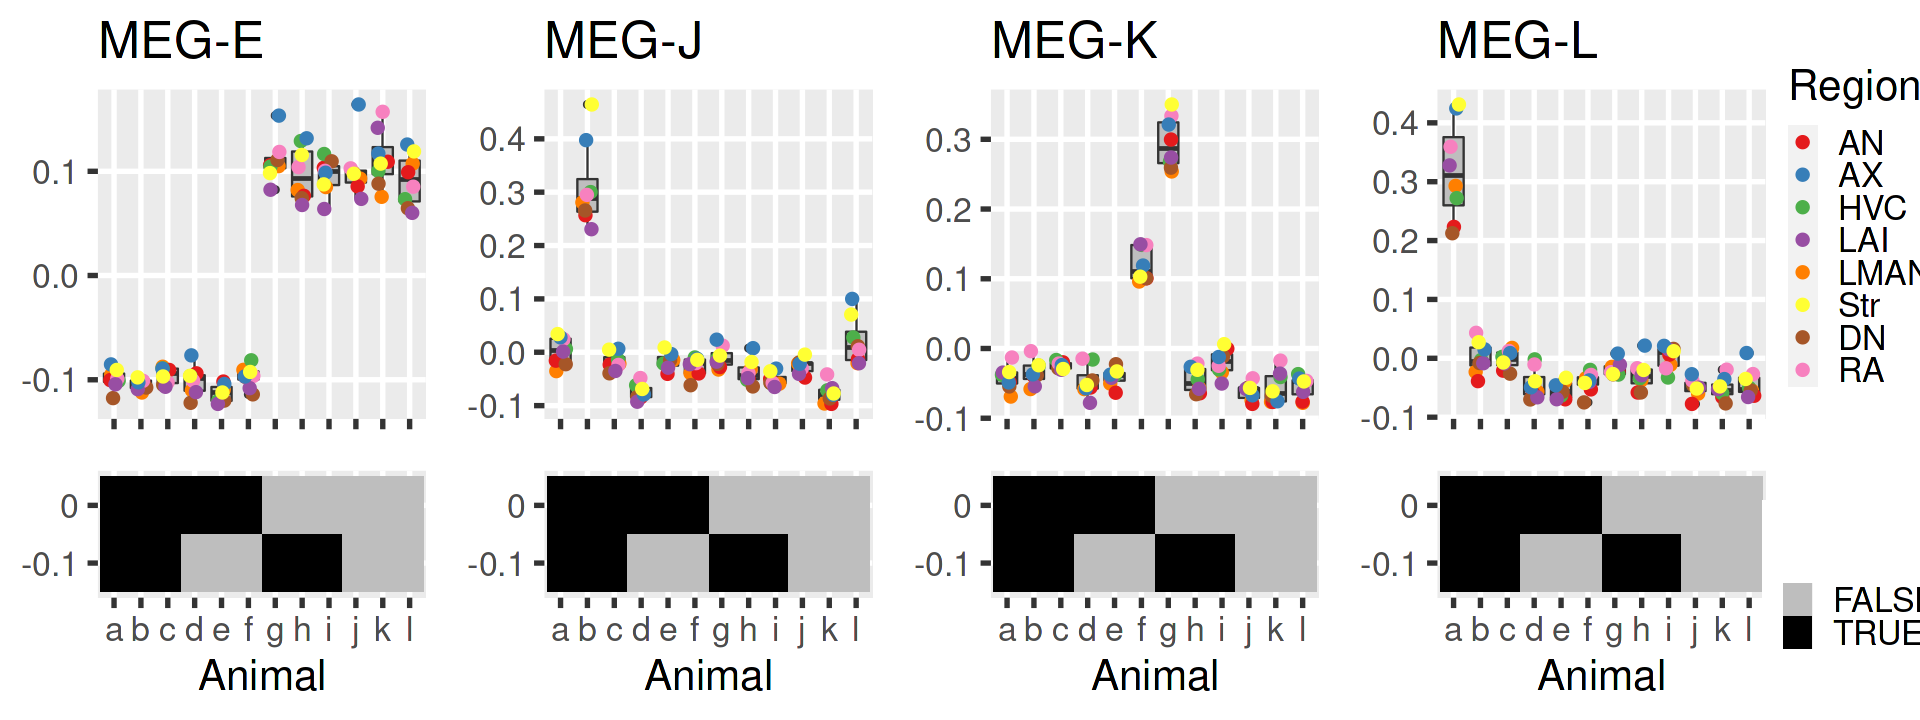

In [128]:
MEG_by_animal_raster <- allmes %>% filter(me=='A') %>% filter(region=='ax') %>% dplyr::select(animal,is_female,is_e2) %>%
    pivot_longer(cols = c(is_female,is_e2),values_to = 'truth', names_to='variable') %>% 
    ggplot(aes(x=animal,y=variable,fill=truth %>% as.factor))+geom_tile()+
        theme_grey(base_size=25)+
        scale_fill_manual('',labels=c('FALSE','TRUE'),values = c("grey", "black")) +
        scale_y_discrete(labels=c('-0.1','0'))+ xlab('Animal')+
        theme(
          axis.title.y = element_blank(),
          panel.grid.minor=element_blank(),#panel.grid.major=element_blank(),
          axis.line.x.bottom=element_blank(),
          axis.line.y.left=element_blank(),
          )

lgnd_2 <- g_legend(MEG_by_animal_raster)
MEG_by_animal_raster <- MEG_by_animal_raster + theme(legend.position = 'none')

options(repr.plot.width=16, repr.plot.height=6)
EJKL_top <- ggarrange(E,J,K,L,lgnd_1,nrow=1,widths=c(1,1,1,1,.3))
EJKL_bottom <- ggarrange(MEG_by_animal_raster,MEG_by_animal_raster,MEG_by_animal_raster,MEG_by_animal_raster,
                         lgnd_2,nrow=1,widths=c(1,1,1,1,.3))
EJKL_by_animal <- ggarrange(EJKL_top,EJKL_bottom,nrow=2,heights = c(1,.6))
EJKL_by_animal
ggsave(file="svg_files/EJKL_by_animal_raster.svg", plot=EJKL_by_animal,width=16, height=6)

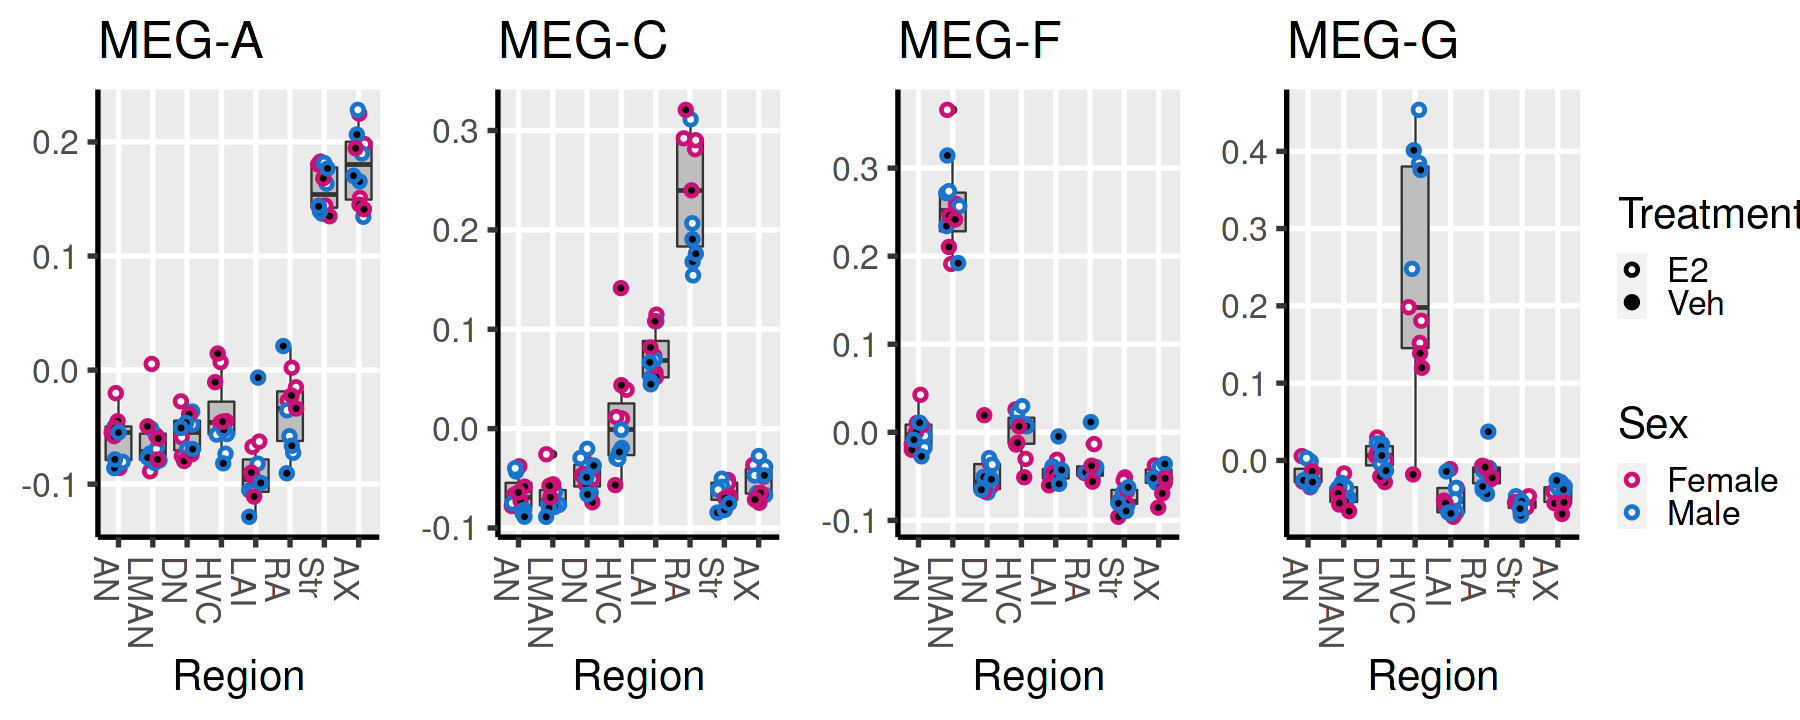

In [162]:
plot_node_boxes <- function(mod){
    tmp <- allmes %>% filter(me==mod)
    tmp <- tmp %>% mutate(region=region %>% as.factor) %>%
        mutate(region = fct_relevel(region,c('an','lman','pln','hvc','lai','ra','mst','ax')))
    tmp2 <- tmp %>% ggplot(aes(x=region,y=me_expression))+geom_boxplot(fill='grey') +
        scale_x_discrete(labels=c('AN','LMAN','DN','HVC','LAI','RA','Str','AX'))+
        geom_jitter(shape=21,size=2,width = .2, aes(color=.data[['sex']],fill=.data[['dose']]),stroke=1.5)+
        scale_fill_manual('Treatment',values = c('white','black'),labels=c('E2','Veh'))+
        scale_color_manual('Sex',values = c('deeppink3','dodgerblue3'),labels=c('Female','Male'))+
        theme_grey(base_size=25) + xlab('Region')+
        theme(axis.title.y=element_blank(),
          panel.grid.minor=element_blank(),#panel.grid.major=element_blank(),
          axis.line.x.bottom=element_line(color='black'),
          axis.line.y.left=element_line(color='black'),
          axis.text.x=element_text(angle = 270,hjust=0)
          )
    return(tmp2)}

A<-plot_node_boxes('A') + ggtitle('MEG-A')
lgnd_2 <- g_legend(A)
A <- A + theme(legend.position='none')
C<-plot_node_boxes('C') + ggtitle('MEG-C')+ theme(legend.position='none')
F<-plot_node_boxes('F') + ggtitle('MEG-F')+ theme(legend.position='none')
G<-plot_node_boxes('G') + ggtitle('MEG-G')+ theme(legend.position='none')
B<-plot_node_boxes('B') + ggtitle('MEG-B')+ theme(legend.position='none')

options(repr.plot.width=15, repr.plot.height=6)
MEG_by_region <- ggarrange(A,C,F,G,lgnd_2,nrow=1,widths = c(1,1,1,1,.5))
MEG_by_region

ggsave(file="svg_files/MEG_by_region.svg", plot=MEG_by_region,width=15, height=6)

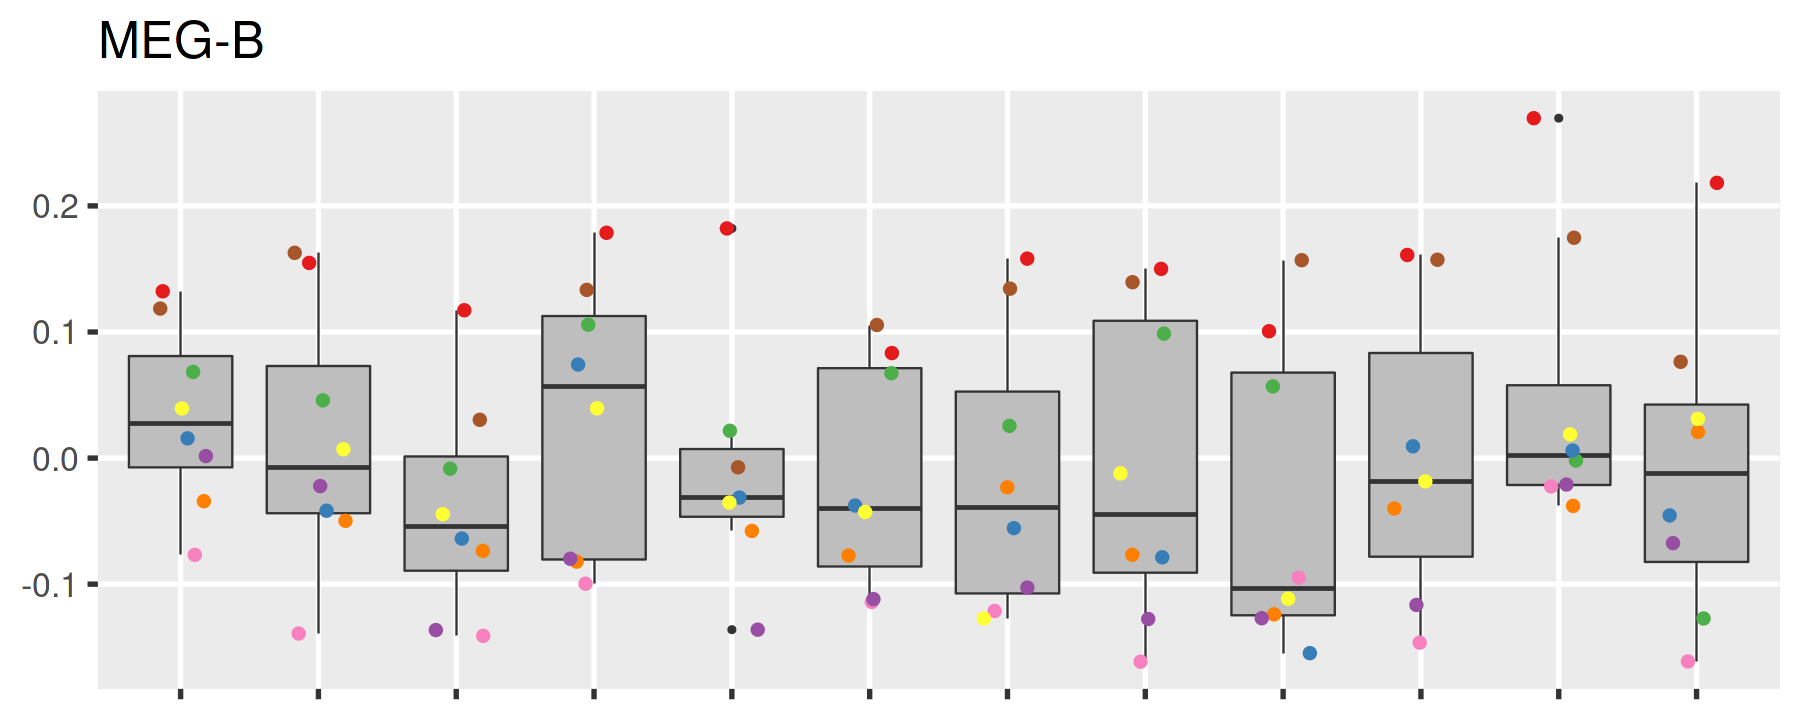

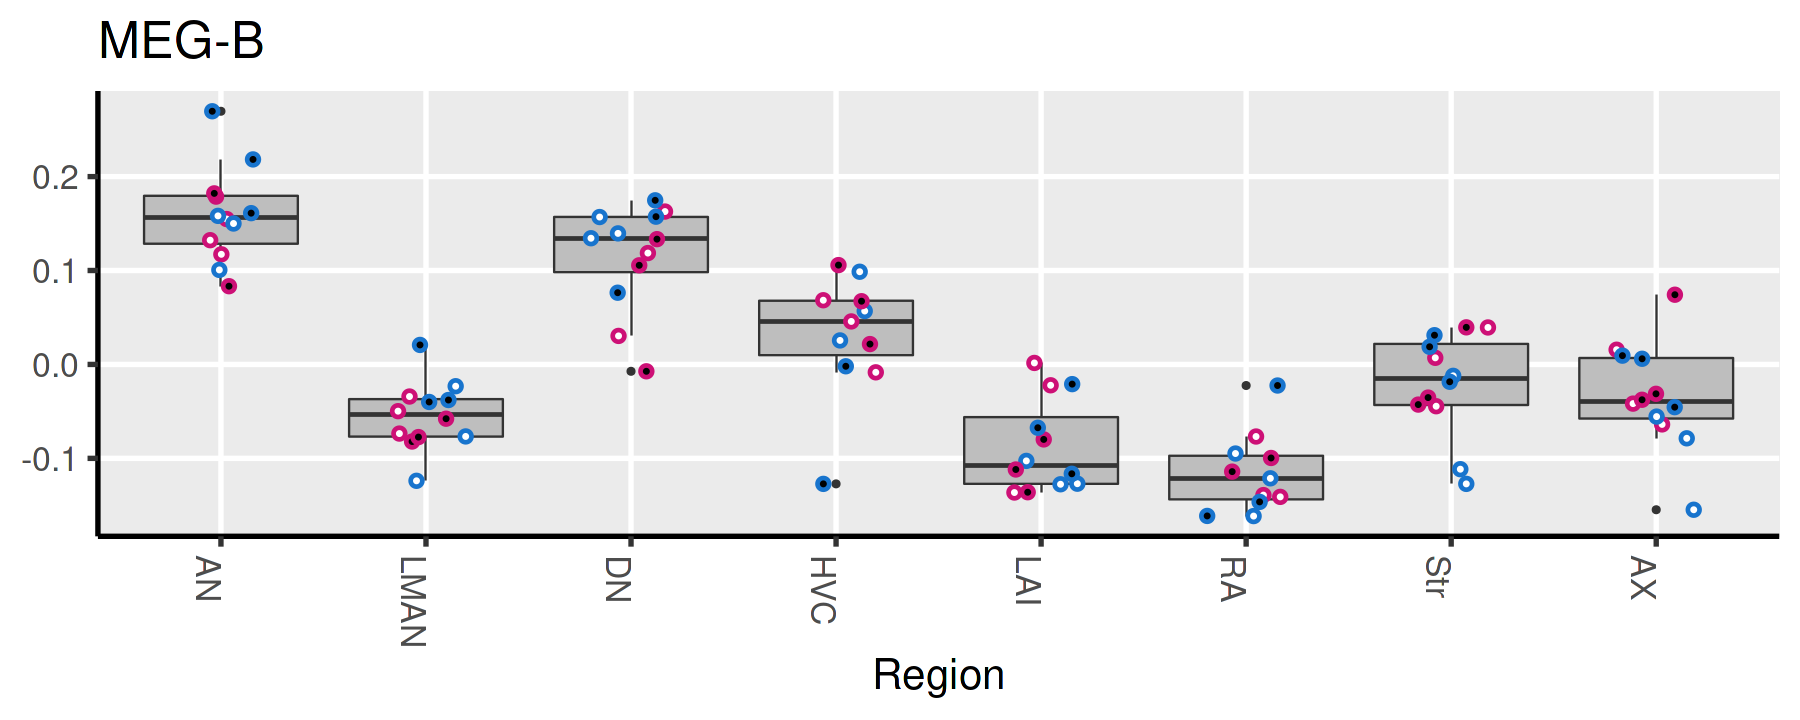

In [164]:
b
B

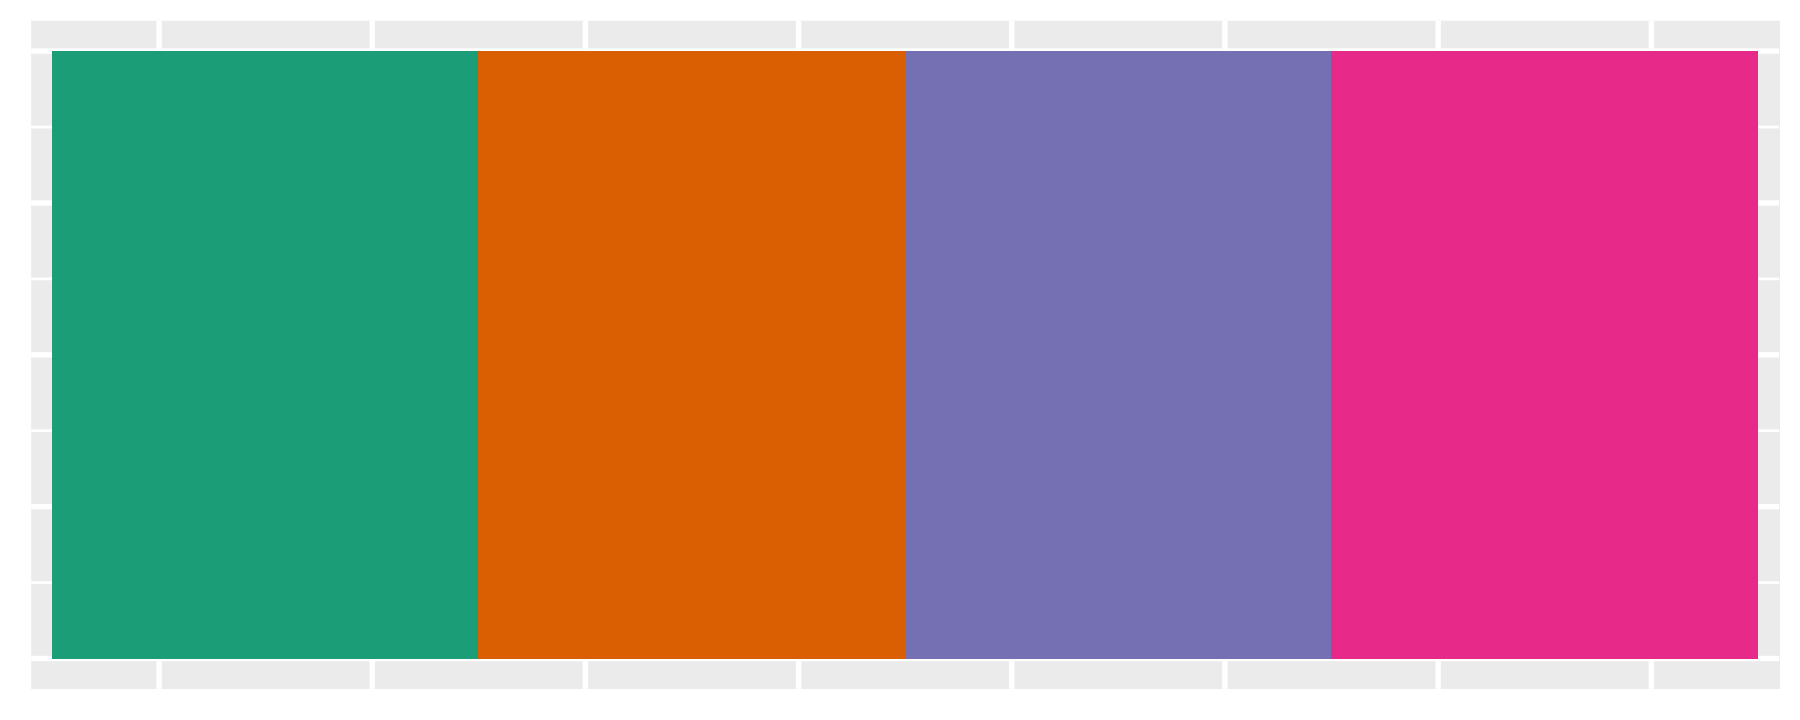

In [163]:
tmp <- allmes %>% filter(me=='A') %>% filter(animal=='a') %>% dplyr::select(region,node) %>%
    mutate(region=region %>% as.factor) %>% mutate(region = fct_relevel(region,
                                                                        c('an','lman','pln',
                                                                          'hvc','lai','ra','mst','ax')))
MEG_by_region_raster <- tmp %>% ggplot(aes(x=region,fill=node %>% as.factor,y=1))+geom_tile()+scale_fill_brewer(palette ='Dark2')+
        theme_grey(base_size=25)+
        theme(legend.title=element_blank(),
            axis.title =element_blank(),
            axis.text = element_blank(),
            axis.ticks = element_blank(),legend.position='none')

MEG_by_region_raster
ggsave(file="svg_files/MEG_by_region_raster.svg", plot=MEG_by_region_raster,width=15, height=6)